# Latar Belakang

Departemen Kepolisian Boston (BPD) meminta sebuah perusahaan yang bergerak dibidang data analis untuk menganalisa data mereka yang mengenai laporan kejadian. laporan kejadian tersebut merupakan dokumentasi detail awal seputar kejadian yang ditanggapi / ditangani oleh petugas BPD. Data ini adalah kumpulan data yang berisi catatan dari sistem laporan insiden kejadian baru, yang mencakup kumpulan informasi yang dikurangi agar difokuskan untuk menganalisa jenis insiden serta kapan dan di mana kejadian tersebut terjadi.

# Pernyataan Masalah
Departemen Kepolisian Kota Boston (BPD) meminta perusahaan kami untuk mencari **kejadian apa saja yang terjadi di kota boston baik dari jenis kejadian, wilayah terjadinya kejadian, ataupun waktu dari kejadian itu terjadi**. informasi ini diharapkan dapat membantu Departement Kepolisian Kota Boston untuk mengurangi tingkat kejadian yang terjadi di kotanya dengan cara mengalokasikan sumber daya dengan lebih efektif dan efisien.

# Target

* Bagaimana cara mengurangi tingkat kejahatan di boston? 
    * kejahatan apa saja yang sering terjadi?
        * berdasarkan Offense Group
        * berdasarkan UCR Part
        * berdasarkan Shooting
    * di waktu kapan yang banyak terjadi kejahatan?
        * berdasarkan tahun
        * berdasarkan bulan
        * berdasarkan musim
        * berdasarkan hari
        * berdasarkan jam
    * di lokasi mana saja yang sering terjadi kejahatan
        * berdasarkan district
        * berdasarkan street

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston). 

Import Packages

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from operator import attrgetter
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Terdapat 2 data set yang diberikan oleh Departement Kepolisian Kota Boston:  
1. Data set offense_codes yang berisi
    - Code : ID unik dari kejahatan yang terjadi
    - Nama : Nama Kejahatan dari code  
<br>
2. Data set crime yang berisikan :
    - INCIDENT_NUMBER : ID unik dari setiap insiden
    - OFFENSE_CODE : adalah kode dari kejahatan atau kejadian apa yang terjadi
    - OFFENSE_CODE_GROUP : kumpulan type atau grup dari kejahatan atau kejadian
    - OFFENSE_DESCRIPTION : deskripsi mengenai kejahatan atau kejadian yang terjadi
    - DISTRICT : merupakan pembagian area atau distrik di boston
    - REPORTING_AREA : nomor area tempat terjadinya kejahatan atau kejadian
    - SHOOTING : Apakah pada kejadian tersebut terjadi penembakan atau tidak
    - OCCURRED_ON_DATE : waktu kejahatan atau kejadian terjadi secara detail.
    - YEAR : Tahun terjadinya kejahatan atau kejadian
    - MONTH : Bulan terjadinya kejahatan atau kejadian
    - DAY_OF_WEEK : Hari terjadinya kejahatan atau kejadian
    - HOUR : Jam terjadinya kejahatan atau kejadian
    - UCR_PART : Jenis pelaporan kejahatan atau kejadian
    - STREET : nama jalan dari lokasi terjadinya kejahatan
    - Lat : garis lintang dari titik lokasi terjadinya kejahatan
    - Long : garis bujur dari titik lokasi terjadinya kejahatan
    - Location : koordinat dari lokasi terjadinya kejahatan

Berikut 5 baris teratas dan terbawah dari dataset Offense_codes

In [100]:
df_code=pd.read_csv('offense_codes.csv', encoding='latin-1')
display(df_code.head(),df_code.tail())

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


,CODE,NAME
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION
575,1620,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE


Berikut 5 baris teratas dan terbawah dari dataset crime.

In [101]:
df_crime=pd.read_csv('crime.csv', encoding='latin-1')
display(df_crime.head(),df_crime.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


## Data Understanding and Cleaning
Sebelum menganalisa data, kita perlu mengenal dataset kita terlebih dahulu dalam tahapan *data understanding*. Dari proses ini, kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

pertama mari kita lihat informasi dari dataset Offense_codes

### Informasi dari dataset Offense_codes

In [102]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_code.shape}')
df_code.info()

Jumlah baris dan kolom di dataset df adalah (576, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CODE    576 non-null    int64 
 1   NAME    576 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [103]:
display(df_code.describe(), df_code.describe(include='object'))

,CODE
count,576.000000
mean,1727.970486
std,1163.050098
min,111.000000
25%,542.000000
50%,1768.000000
75%,2900.250000
max,3831.000000


,NAME
count,576
unique,479
top,CHINS
freq,3


In [104]:
pd.set_option('display.max_colwidth', -1)
# data unique di tiap kolom
listItem = []
for col in df_code.columns :
    listItem.append( [col, df_code[col].nunique(), df_code[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,CODE,425,"[612, 613, 615, 1731, 3111, 2646, 2204, 3810, 3801, 3807, 3803, 3805, 3802, 3205, 123, 121, 3501, 3502, 3503, 111, 3303, 2623, 2628, 1711, 2007, 2102, 2660, 2900, 1109, 2616, 2606, 2636, 3029, 3106, 1300, 3207, 3201, 3202, 3208, 1304, 1603, 1605, 1601, 1602, 242, 254, 271, 244, 251, 241, 243, 261, 252, 253, 735, 3620, 301, 311, 351, 361, 371, 381, 3403, 3109, 3110, 1730, 3006, 801, 804, 1704, 2647, 3410, 2610, 2642, 2915, 2907, 2906, 2905, 2914, 1402, 1415, 3301, 2657, 2641, 2006, 2663, 3125, 2511, 2613, 3002, 3402, 802, 423, 413, 724, 727, 706, 541, 540, 562, ...]"
1,NAME,479,"[LARCENY PURSE SNATCH - NO FORCE , LARCENY SHOPLIFTING, LARCENY THEFT OF MV PARTS & ACCESSORIES, INCEST, LICENSE PREMISE VIOLATION, LIQUOR - DRINKING IN PUBLIC, LIQUOR LAW VIOLATION, M/V ACCIDENT - INVOLVING ÊBICYCLE - INJURY, M/V ACCIDENT - OTHER, M/V ACCIDENT - OTHER CITY VEHICLE, M/V ACCIDENT - PERSONAL INJURY, M/V ACCIDENT - POLICE VEHICLE, M/V ACCIDENT - PROPERTY ÊDAMAGE, M/V PLATES - LOST, MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE, MANSLAUGHTER - VEHICLE - NEGLIGENCE, MISSING PERSON, MISSING PERSON - LOCATED, MISSING PERSON - NOT REPORTED - LOCATED, MURDER, NON-NEGLIGIENT MANSLAUGHTER, NOISY PARTY/RADIO-ARREST, OBSCENE MATERIALS - PORNOGRAPHY, OBSCENE PHONE CALLS, OPEN & GROSS LEWDNESS, VIOL. OF RESTRAINING ORDER W NO ARREST, OPERATING UNDER THE INFLUENCE DRUGS, OTHER OFFENSE, VAL - VIOLATION OF AUTO LAW - OTHER, FRAUD - WIRE, POSSESSION OF BURGLARIOUS TOOLS, PRISONER ATTEMPT TO RESCUE, PRISONER ESCAPE / ESCAPE & RECAPTURE, PRISONER - SUICIDE / SUICIDE ATTEMPT, PROPERTY - ACCIDENTAL DAMAGE, STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING, PROPERTY - FOUND, PROPERTY - LOST, PROPERTY - LOST THEN LOCATED, PROPERTY - MISSING, PROPERTY - STOLEN THEN RECOVERED, PROSTITUTION - ASSISTING OR PROMOTING, PROSTITUTION - COMMON NIGHTWALKER, PROSTITUTION, PROSTITUTION - SOLICITING, RAPE - ATTEMPT - SODOMY, RAPE - COMPLETE - FONDLING, RAPE - COMPLETE - OTHER, RAPE - ATTEMPT - FONDLING, RAPE - COMPLETE - FORCIBLE, RAPE - ATTEMPT - FORCIBLE, RAPE - ATTEMPT - SEXUAL ASSAULT W/ OBJECT, RAPE - ATTEMPT - OTHER, RAPE - COMPLETE - SODOMY, RAPE - COMPLETE - SEXUAL ASSAULT W/ OBJECT, RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON), REPORT AFFECTING OTHER DEPTS., ROBBERY - STREET, ROBBERY - COMMERCIAL, ROBBERY - BANK, ROBBERY - OTHER, ROBBERY - HOME INVASION, ROBBERY - CAR JACKING, PROTECTIVE CUSTODY / SAFEKEEPING, SERVICE TO OTHER PD INSIDE OF MA., SERVICE TO OTHER PD OUTSIDE OF MA., SEXUAL ASSAULT INVESTIGATION, SICK/INJURED/MEDICAL - PERSON, ASSAULT - SIMPLE, STALKING, STATUTORY RAPE, THREATS TO DO BODILY HARM, TOWED MOTOR VEHICLE, TRESPASSING, TRUANCY / RUNAWAY, VAL - MISCELLANEOUS, VAL - OPERATING AFTER REV/SUSP., VAL - OPERATING UNREG/UNINS ÊCAR, VAL - OPERATING WITHOUT LICENSE, VAL - OPERATING W/O AUTHORIZATION LAWFUL, VANDALISM, GRAFFITI, VERBAL DISPUTE, VIOLATION - CITY ORDINANCE, VIOLATION - HAWKER AND PEDDLER, VIOL. OF RESTRAINING ORDER W ARREST, VIOLATION - CITY ORDINANCE CONSTRUCTION PERMIT, WARRANT ARREST, KIDNAPPING - ENTICING OR ATTEMPTED, ANIMAL ABUSE, ANIMAL CONTROL - DOG BITES - ETC., ANIMAL INCIDENTS, ASSAULT SIMPLE - BATTERY, ASSAULT - AGGRAVATED, ASSAULT - AGGRAVATED - BATTERY, AUTO THEFT, AUTO THEFT - LEASED/RENTED VEHICLE, AUTO THEFT - MOTORCYCLE / SCOOTER, BURGLARY - COMMERICAL - ATTEMPT, BURGLARY - COMMERICAL - FORCE, BURGLARY - OTHER - NO FORCE, ...]"


In [105]:
df_code.isna().sum()

CODE    0
NAME    0
dtype: int64

In [106]:
df_code.duplicated().sum()

83

Secara Umum, bisa dilihat dari data tersebut bahwa:
* Dataset Offense_Code memiliki 2 kolom dan 576 baris
* Tidak ada kolom yang memiliki data kosong (NaN)
* Kolom CODE berisikan hanya kode - kode dari nama kejahatan (kode unik)
* Kolom NAME berisikan Nama atau deskripsi dari kejadian atau kejahatan 
* Terdapat 83 data yang duplikat

### Informasi dari dataset Crime

In [107]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_crime.shape}')
df_crime.info()

Jumlah baris dan kolom di dataset df adalah (319073, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat        

In [108]:
display(df_crime.describe(), df_crime.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


In [109]:
pd.set_option('display.max_colwidth', -1)
# data unique di tiap kolom
listItem = []
for col in df_crime.columns :
    listItem.append( [col, df_crime[col].nunique(), df_crime[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, I182070908, I182070906, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070889, I182070888, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070866, I182070865, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070839, I182070838, I182070837, I182070836, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070820, I182070819, I182070818, ...]"
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3006, 3305, 614, 3801, 3803, 522, 3831, 802, 2007, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 1843, 3125, 1841, 3802, 3018, 2405, 617, 3625, 3106, 3501, 3115, 616, 3807, 1102, 1849, 2905, 1810, 1842, 1806, 1848, 1844, 423, 3205, 413, 1501, 3001, 3830, 561, 2914, 2610, 1109, 706, 2403, 3160, 900, 801, 3002, 520, 2648, 670, 615, 3116, 1504, 1830, 361, 2006, 311, 1001, 3810, 2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112, 3502, 735, 612, 560, 381, 3402, 1815, 1107, 2101, 1106, 3202, 1503, ...]"
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Medical Assistance, Assembly or Gathering Violations, Larceny From Motor Vehicle, Residential Burglary, Simple Assault, Restraining Order Violations, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Drug Violation, Warrant Arrests, Disorderly Conduct, Property Related Damage, Missing Person Reported, Investigate Person, Fraud, Aggravated Assault, License Plate Related Incidents, Firearm Violations, Other Burglary, Arson, Bomb Hoax, Harbor Related Incidents, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Missing Person Located, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Search Warrants, License Violation, Commercial Burglary, HOME INVASION, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Evading Fare, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Criminal Harassment, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, Gambling, INVESTIGATE PERSON, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY, AUTO THEFT, VERBAL DISPUTE, ROBBERY - STREET, FIRE REPORT - HOUSE, BUILDING, ETC., THREATS TO DO BODILY HARM, PROPERTY - LOST, SICK/INJURED/MEDICAL - PERSON, DEMONSTRATIONS/RIOT, LARCENY THEFT FROM MV - NON-ACCESSORY, M/V ACCIDENT - OTHER, M/V ACCIDENT - PERSONAL INJURY, BURGLARY - RESIDENTIAL - NO FORCE, M/V - LEAVING SCENE - PROPERTY DAMAGE, ASSAULT SIMPLE - BATTERY, VIOL. OF RESTRAINING ORDER W NO ARREST, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP., HARASSMENT, BALLISTICS EVIDENCE/FOUND, PROPERTY - FOUND, LARCENY SHOPLIFTING, SERVICE TO OTHER PD INSIDE OF MA., FIRE REPORT/ALARM - FALSE, DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP, WARRANT

In [110]:
# Jumlah data kosong

df_crime.isna().sum()

INCIDENT_NUMBER        0     
OFFENSE_CODE           0     
OFFENSE_CODE_GROUP     0     
OFFENSE_DESCRIPTION    0     
DISTRICT               1765  
REPORTING_AREA         0     
SHOOTING               318054
OCCURRED_ON_DATE       0     
YEAR                   0     
MONTH                  0     
DAY_OF_WEEK            0     
HOUR                   0     
UCR_PART               90    
STREET                 10871 
Lat                    19999 
Long                   19999 
Location               0     
dtype: int64

In [111]:
# Jumlah data duplicate

df_crime.duplicated().sum()

23

In [112]:
df_crime[df_crime['OFFENSE_CODE']==3125].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
185,I182070732,3125,Warrant Arrests,WARRANT ARREST,A1,121,NaN,2018-09-03 02:26:00,2018,9,Monday,2,Part Three,FAYETTE ST,42.349437,-71.066507,"(42.34943694, -71.06650735)"
439,I182070437,3125,Warrant Arrests,WARRANT ARREST,E5,822,NaN,2018-09-02 00:28:00,2018,9,Sunday,0,Part Three,RIDGECREST TER,42.262353,-71.153505,"(42.26235312, -71.15350513)"
550,I182070322,3125,Warrant Arrests,WARRANT ARREST,B2,280,NaN,2018-09-01 16:04:00,2018,9,Saturday,16,Part Three,WARREN ST,42.329025,-71.083415,"(42.32902469, -71.08341505)"
552,I182070319,3125,Warrant Arrests,WARRANT ARREST,B2,238,NaN,2018-09-01 16:06:00,2018,9,Saturday,16,Part Three,QUINCEFIELD ST,42.318730,-71.066607,"(42.31873011, -71.06660708)"


In [113]:
df_code[df_code['CODE']==3125].head()

,CODE,NAME
86,3125,WARRANT ARREST
528,3125,WARRANT ARREST


Secara umum, kita bisa melihat dari data bahwa :
* Data set Crime memiliki 319.073 baris dan 17 kolom
* Kolom `DISTRIC`, `SHOOTING`, `UCR_PART`, `STREET`, `LAT`, `LONG` memiliki data kosong (NaN).
* Kolom `SHOOTING` bukan menunjukkan bahwa data pada kolom tersebut lupa dimasukkan, melainkan penjelasan bahwa apakah ada penembakan pada kejahatan yang terjadi.
* Kolom `REPORTING_AREA` berisikan ID unik dari setiap lokasi kejadian kejahatan, karena tidak relevan bisa di drop aja.
* Kolom `OFFENSE_CODE` berisikan code mengenai kejahatan yang terjadi, karena kolom ini sama seperti kolom `CODE` di dataset Offense_code, maka bisa menggunakan kolom di dataset ini saja.
* Kolom `OFFENSE_DESCRIPTION` berisikan deskripsi mengenai kejahatan yang terjadi, karena kolom ini sama seperti kolom `NAME` di dataset Offense_code, maka bisa menggunakan kolom di dataset ini saja.
* Karena isi kolom dari dataset `Offense_code` keduanya ada dataset ini maka dataset Offense_code bisa tidak kita gunakan.
* Kolom `SHOOTING` memiliki kolom kosong yang sangat banyak, namun di dataset ini maksud dari kolom `SHOOTING` adalah kejadian kejahatan yang terjadi apakah terdapat penembakan juga atau tidak.
* Kolom `OCCURRED_ON_DATE` memiliki data tipe object, seharusnya kolom ini berisi datetime, kita bisa ubah data type nya atau bisa diabaikan karena dataset Crime sudah memiliki kolom `YEAR`, `MONTH`, `DAY_OF_WEEK`, dan `HOUR` yang sudah mewakili isi data tersebut.
* Kolom `Location` memiliki data koordinat yang berisikan angka 0 (0.00000000, 0.00000000)
* Terdapat 23 data yang duplikat

## Mising Value

### Missing value di tiap kolom pada data `Crime`

In [114]:
df_crime.isna().sum()/df_crime.shape[0]*100

INCIDENT_NUMBER        0.000000 
OFFENSE_CODE           0.000000 
OFFENSE_CODE_GROUP     0.000000 
OFFENSE_DESCRIPTION    0.000000 
DISTRICT               0.553165 
REPORTING_AREA         0.000000 
SHOOTING               99.680637
OCCURRED_ON_DATE       0.000000 
YEAR                   0.000000 
MONTH                  0.000000 
DAY_OF_WEEK            0.000000 
HOUR                   0.000000 
UCR_PART               0.028207 
STREET                 3.407057 
Lat                    6.267845 
Long                   6.267845 
Location               0.000000 
dtype: float64

<AxesSubplot:>

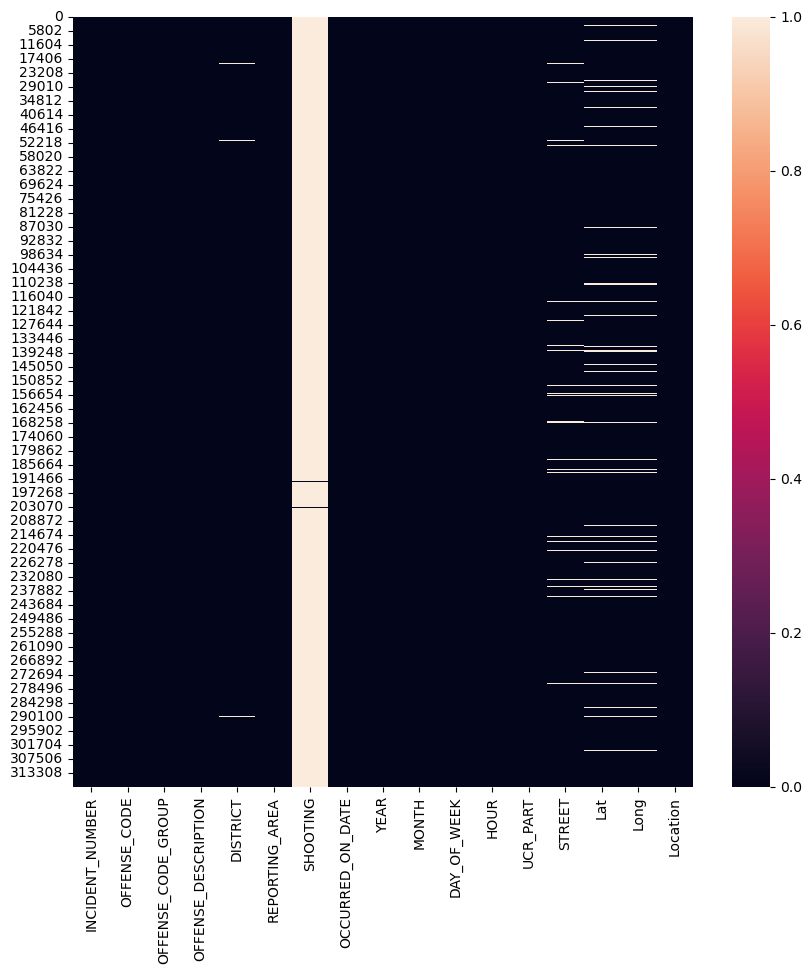

In [115]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df_crime[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']].isna())

Secara garis besar:  
* *missing value* di kolom `SHOOTING` memiliki proporsi tertinggi yaitu 99.68%
* *missing value* di kolom `DISTRIC`, `UCR_PART`, `STREET`, `LAT`, dan `LONG` memiliki proporsi (<10%), dengan missing value di kolom `LAT` dan `LONG` yang tertinggi mencapai 6.26%
* *missing value* di kolom `STREET`, `LAT` dan `LONG` memiliki sebaran yang terlihat berkaitan, jika data di `LAT` kosong, maka kemungkinan besar data di `LONG` juga kosong, dan jika data di `LAT` dan `LONG` kosong, maka ada kemungkinan  data di `STREET` juga kosong.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. 
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. ataupun bila dapat menyebabkan bias, kita bisa membiarkan atau mengabaikannya (selama tidak memiliki pengaruh signifikan). Menghapus data akan menjadi opsi terakhir.

Karena ada beberapa data yang missing value, maka kita lihat apa yang dapat dilakukan terhadal data tersebut terlebih dahulu.

### `DISTRICT`

In [116]:
# jumlah missing value di kolom 'DISTRICT'

df_crime[['DISTRICT']].isna().sum()

DISTRICT    1765
dtype: int64

Terdapat 1.765 data kosong pada kolom `DISTRICT`.

In [117]:
df_crime[df_crime['DISTRICT'].isna()].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
20,I182070913,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 18:46:00,2018,9,Monday,18,Part Three,WOLCOTT,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"


Dari analisis di atas, *missing value* pada kolom `DISTRIC` menurut kami tidak ada cara untuk mengisinya, karena distrik merupakan kelompok lokasi yang dimana jika dipaksakan akan menyebabkan bias lokasi (district), oleh karen itu *missing value* akan di abaikan, dan juga *missing value* di kolom ini hanya memiliki proporsi yang kecil jika dibandingkan dengan total keseluruhan data yaitu hanya 1.765 data (0.55%) sehingga tidak ada pengaruh yang signifikan.

### `UCR_PART`

UCR adalah singkatan dari Uniform Crime Reporting. UCR adalah sebuah program yang dikelola oleh Federal Bureau of Investigation (FBI) di Amerika Serikat yang bertujuan untuk mengumpulkan data kejahatan yang dilaporkan oleh agen polisi dari seluruh negara bagian. Data ini digunakan untuk menilai tren kejahatan dan membantu pihak berwenang mengambil tindakan yang tepat untuk meminimalisasi tingkat kejahatan. UCR juga membantu memberikan laporan statistik kejahatan yang akurat dan terpercaya untuk masyarakat dan pemerintah

In [118]:
# jumlah missing value di kolom 'UCR_PART'

df_crime[['UCR_PART']].isna().sum()

UCR_PART    90
dtype: int64

In [119]:
df_crime[df_crime['UCR_PART'].isna()].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1252,I182069560,2010,HOME INVASION,HOME INVASION,C6,915,NaN,2018-08-30 08:19:00,2018,8,Thursday,8,NaN,E NINTH ST,42.331463,-71.050126,"(42.33146325, -71.05012560)"
9214,I182060810,2010,HOME INVASION,HOME INVASION,E18,493,NaN,2018-08-01 14:52:00,2018,8,Wednesday,14,NaN,REDDY AVE,42.262855,-71.111811,"(42.26285498, -71.11181148)"
11592,I182058223,2010,HOME INVASION,HOME INVASION,A7,907,NaN,2018-07-24 05:23:00,2018,7,Tuesday,5,NaN,HAVRE ST,42.369912,-71.040926,"(42.36991243, -71.04092628)"
19577,I182049767,2010,HOME INVASION,HOME INVASION,B2,297,NaN,2018-06-25 16:37:00,2018,6,Monday,16,NaN,SAINT RICHARD ST,42.323190,-71.083564,"(42.32318974, -71.08356389)"
22316,I182046836,2010,HOME INVASION,HOME INVASION,C11,347,NaN,2018-06-16 02:31:00,2018,6,Saturday,2,NaN,LYON ST,42.306383,-71.060212,"(42.30638323, -71.06021218)"


Terdapat 90 data kosong pada kolom UCR_PART, mari kita coba isi

In [120]:
# memfilter data yang memiliki nilai NaN pada kolom 'UCR_PART'
df_crime_filtered = df_crime[df_crime['UCR_PART'].isna()]

# mengambil nilai unik pada kolom 'OFFENSE_CODE'
df_crime_filtered['OFFENSE_CODE'].unique()

array([2010, 3115, 1610, 1620], dtype=int64)

terdapat value NaN pada Kolom UCR_PART, dimana OFFENSE_CODE nya adalah 2010, 3115, 1610, 1620, mari kita isi satu satu

In [121]:
display('OC 2010', df_crime[df_crime['OFFENSE_CODE']==2010]['UCR_PART'].unique(),
        'OC 3115', df_crime[df_crime['OFFENSE_CODE']==3115]['UCR_PART'].unique(),
        'OC 1610', df_crime[df_crime['OFFENSE_CODE']==1610]['UCR_PART'].unique(),
        'OC 1620', df_crime[df_crime['OFFENSE_CODE']==1620]['UCR_PART'].unique())

'OC 2010'

array([nan], dtype=object)

'OC 3115'

array(['Part Three', nan], dtype=object)

'OC 1610'

array([nan], dtype=object)

'OC 1620'

array([nan], dtype=object)

In [122]:
df_crime[df_crime['OFFENSE_CODE']==3115].head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
59,I182070870,3115,Investigate Person,INVESTIGATE PERSON,E18,493,NaN,2018-09-03 15:51:00,2018,9,Monday,15,Part Three,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)"
74,I182070851,3115,Investigate Person,INVESTIGATE PERSON,E18,957,NaN,2018-09-03 14:39:00,2018,9,Monday,14,Part Three,CLIFFMONT ST,42.276682,-71.120653,"(42.27668221, -71.12065268)"
86,I182070837,3115,Investigate Person,INVESTIGATE PERSON,B3,449,NaN,2018-09-03 13:56:00,2018,9,Monday,13,Part Three,WHITFIELD ST,42.292221,-71.074671,"(42.29222130, -71.07467073)"
113,I182070812,3115,Investigate Person,INVESTIGATE PERSON,E18,525,NaN,2018-09-03 12:00:00,2018,9,Monday,12,Part Three,WOLCOTT ST,42.237977,-71.130009,"(42.23797683, -71.13000944)"
129,I182070796,3115,Investigate Person,INVESTIGATE PERSON,A1,61,NaN,2018-09-03 11:07:00,2018,9,Monday,11,Part Three,BEVERLY ST,42.366587,-71.060199,"(42.36658726, -71.06019881)"


kolom OFFENSE_CODE yang bervalue 3115 memiliki kode UCR_PART **Part Three**, sedangkan kolom lain tidak memiliki value, maka mari kita isi kolom 3115.

In [123]:
df_crime.loc[df_crime['OFFENSE_CODE'] == 3115, 'UCR_PART'] = "Part Three"
df_crime.loc[df_crime['OFFENSE_CODE'] == 2010, 'UCR_PART'] = "Other"
df_crime.loc[df_crime['OFFENSE_CODE'] == 1610, 'UCR_PART'] = "Other"
df_crime.loc[df_crime['OFFENSE_CODE'] == 1620, 'UCR_PART'] = "Other"

In [124]:
# memfilter data yang memiliki nilai NaN pada kolom 'UCR_PART'
df_crime_filtered = df_crime[df_crime['UCR_PART'].isna()]

# mengambil nilai unik pada kolom 'OFFENSE_CODE'
df_crime_filtered['OFFENSE_CODE'].unique()

array([], dtype=int64)

In [125]:
# jumlah missing value di kolom 'UCR_PART'

df_crime[['UCR_PART']].isna().sum()

UCR_PART    0
dtype: int64

Data kosong pada kolom `UCR_PART` sudah diisi sebagian (OFFENSE_CODE = 3115 diisi dengan UCR_PART = Part Three), namun untuk sisa kolom yang masih berisi NaN, kami menganggap tidak ada cara untuk mengisinya karena OFFENSE_CODE 2010 seluruhnya tidak memiliki value di kolom UCR_PART, maka sisa value kosong yang masih ada jika dibandingkan dengan total keseluruhan data yaitu hanya 86 data (0.027%)

### `SHOOTING`

Kolom `SHOOTING` memiliki sangat banyak sekali data kosong (99.68%). namun setelah di cek kolom ini seharusnya berisi data biner (yes or no), oleh karena itu maka kolom Nan kita isi dengan N (No).

In [126]:
# jumlah missing value di kolom 'SHOOTING'

df_crime[['SHOOTING']].isna().sum()

SHOOTING    318054
dtype: int64

In [127]:
df_crime[['SHOOTING']].value_counts()

SHOOTING
Y           1019
dtype: int64

Terdapat 318.054 data kosong pada kolom `SHOOTING`. Jika diperhatikan data kosong (NaN) seharusnya diisi dengan N (No).

In [128]:
# Mengisi data kosong (NaN) dengan N

df_crime['SHOOTING'] = df_crime['SHOOTING'].fillna('N')

In [129]:
# jumlah missing value di kolom 'SHOOTING' sudah tidak ada

df_crime[['SHOOTING']].isna().sum()

SHOOTING    0
dtype: int64

In [130]:
df_crime[['SHOOTING']].value_counts()

SHOOTING
N           318054
Y           1019  
dtype: int64

Data pada kolom `SHOOTING` sudah di bersihkan dan tidak ada data kosong lagi, sehingga terdapat 318.054 N (tidak ada penembakan) dan 1.019 Y (ada penembakan)

### `STREET`

In [131]:
# jumlah missing value di kolom 'STREET'

df_crime[['STREET']].isna().sum()

STREET    10871
dtype: int64

Terdapat 10.871 data kosong pada kolom `STREET`. Pertama, kita lihat apakah data-data kosong di kolom 

In [132]:
df_crime[df_crime['STREET'].isna()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,N,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,N,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,N,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,N,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
41,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,N,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318811,I142054044-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,N,2015-07-17 00:00:00,2015,7,Friday,0,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318812,I142054044-00,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",E13,565,N,2015-07-17 00:00:00,2015,7,Friday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319015,I120720047-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [133]:
df_crime[['STREET']].mode()

,STREET
0,WASHINGTON ST


Untuk penanganan data kosong pada kolom `STREET`, kami merasa tidak ada cara yang sesuai karena `STREET` merupakan hal unik yang tidak bisa diisi dengan mean, median, atau modus. bila dipaksakan untuk diisi akan membuat bias terhadap lokasi (dalam hal ini nama jalan) tempat kejadian terjadi.

apabila diperlukan untuk penghitungan atau proses, nanti data kosong pada kolom ini akan di abaikan (.dropna)

### `Lat` dan `Long`

In [134]:
# jumlah missing value di kolom 'Lat' dan 'Long

df_crime[['Lat', 'Long']].isna().sum()

Lat     19999
Long    19999
dtype: int64

In [135]:
# menampilkan data kosong di kolom 'Lat', dan karena 'Lat' dan 'Long' berhubungan kita juga bisa melihat data kosong di kolom 'Long'
display(df_crime[df_crime['Lat'].isna()])

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
42,I182070888,301,Robbery,ROBBERY - STREET,A1,76,N,2018-09-03 15:45:00,2018,9,Monday,15,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
386,I182070501,361,Robbery,ROBBERY - OTHER,B2,177,N,2018-09-01 19:00:00,2018,9,Saturday,19,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
405,I182070479,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,,N,2018-09-02 05:06:00,2018,9,Sunday,5,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
482,I182070388,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,177,N,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
483,I182070388,1874,Drug Violation,DRUGS - OTHER,C6,177,N,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319017,I120720047-00,334,Robbery,ROBBERY - UNARMED - BUSINESS,E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319042,I110611058-00,3125,Warrant Arrests,WARRANT ARREST,A1,,N,2018-08-29 17:00:00,2018,8,Wednesday,17,Part Three,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.00000000)"
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,N,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


### `Location`

In [136]:
df_crime[df_crime['Location']=='(0.00000000, 0.00000000)']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
42,I182070888,301,Robbery,ROBBERY - STREET,A1,76,N,2018-09-03 15:45:00,2018,9,Monday,15,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
386,I182070501,361,Robbery,ROBBERY - OTHER,B2,177,N,2018-09-01 19:00:00,2018,9,Saturday,19,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
405,I182070479,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,,N,2018-09-02 05:06:00,2018,9,Sunday,5,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
482,I182070388,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,177,N,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
483,I182070388,1874,Drug Violation,DRUGS - OTHER,C6,177,N,2018-09-01 19:29:23,2018,9,Saturday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319017,I120720047-00,334,Robbery,ROBBERY - UNARMED - BUSINESS,E13,565,N,2015-07-17 09:23:00,2015,7,Friday,9,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319042,I110611058-00,3125,Warrant Arrests,WARRANT ARREST,A1,,N,2018-08-29 17:00:00,2018,8,Wednesday,17,Part Three,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.00000000)"
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,N,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


Terlihat bahwa *missing value* pada kolom `Lat` dan `Long` tidak dapat kita isi berdasarkan kolom `Location` karena di kolom tersebut lokasi ditunjukkan dengan value (0.00000000, 0.00000000). oleh karena itu data tersebut akan diabaikan dan akan di .dropna dalam proses analisa karena data di baris tersebut tetap dibutuhkan.

### Data Duplicate

In [137]:
# Jumlah data yang duplikat

df_crime.duplicated().sum()

23

In [138]:
# kita cek jika semua data termasuk yang duplikat dihitung

duplicated_rows = df_crime.duplicated(keep=False)
total_duplicated = duplicated_rows.sum()
total_duplicated


46

In [139]:
df_crime[df_crime.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318745,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,N,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318755,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,N,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318781,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,N,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318785,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,N,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
318808,I142060752-00,2610,Other,TRESPASSING,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Two,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318810,I142060752-00,3125,Warrant Arrests,WARRANT ARREST,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Three,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318826,I142049917-00,1402,Vandalism,VANDALISM,C11,395,N,2015-09-03 13:00:00,2015,9,Thursday,13,Part Two,DORCHESTER AVE,42.285260,-71.064441,"(42.28526024, -71.06444063)"
318866,I142025900-00,3125,Warrant Arrests,WARRANT ARREST,E13,577,N,2015-12-01 18:00:00,2015,12,Tuesday,18,Part Three,AMORY ST,42.317713,-71.101805,"(42.31771264, -71.10180456)"
318887,I142017108-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,A1,64,N,2015-06-16 15:55:00,2015,6,Tuesday,15,Part Two,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"


In [140]:
df_crime[df_crime['INCIDENT_NUMBER']=='I142060752-00']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318807,I142060752-00,2610,Other,TRESPASSING,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Two,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318808,I142060752-00,2610,Other,TRESPASSING,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Two,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318809,I142060752-00,3125,Warrant Arrests,WARRANT ARREST,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Three,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318810,I142060752-00,3125,Warrant Arrests,WARRANT ARREST,B2,280,N,2015-12-11 12:50:00,2015,12,Friday,12,Part Three,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"


bisa dilihat bahwa satu Incident Number dapat mempunyai beberapa Offense_code, yang artinya 1 kejahatan bisa mendapatkan beberapa pasal, oleh karena itu maka kami menggabungkan kolom `INCIDENT_NUMBER` dan `OFFENSE_CODE` sementara agar incident number yang memiliki pasal berbeda bisa tetap ada dan yang terhapus yang benar benar data duplikat berdasarkan kolom baru.

In [141]:
# Membuat tabel baru untuk mencari duplikat

df_crime['INCIDENT_OFFENSE'] = df_crime['INCIDENT_NUMBER'].astype(str) + '-' + df_crime['OFFENSE_CODE'].astype(str)

In [142]:
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT_OFFENSE
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",I182070945-619
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",I182070943-1402
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",I182070941-3410
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",I182070940-3114
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",I182070938-3114


In [143]:
# kita cek data duplikat berdasarkan kolom baru

df_crime.duplicated('INCIDENT_OFFENSE').sum()

36

In [144]:
df_crime[df_crime['INCIDENT_OFFENSE']=='I152026775-00-3115']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT_OFFENSE
318751,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)",I152026775-00-3115
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)",I152026775-00-3115
318753,I152026775-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)",I152026775-00-3115


disini terlihat data yang duplikat benar benar mirip, maka kita lanjutkan ke penghapusan data duplikat

In [145]:
df_crime.drop_duplicates(subset='INCIDENT_OFFENSE', keep='first', inplace=True)

In [146]:
# Drop kolom sementara yang berisi INCIDENT_NUMBER dan OFFENSE_CODE dan 

df_crime.drop('INCIDENT_OFFENSE', axis=1, inplace=True)

In [147]:
# cek kembali data duplikat

df_crime.duplicated().sum()

0

In [148]:
df_crime[df_crime.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


data duplikat dan kolom sementara yang dibikin sudah terhapus

### Drop Kolom yang tidak digunakan. 

In [149]:
df_crime.drop(['REPORTING_AREA', 'Location'], axis=1, inplace=True)

### Mengubah tipe data

Mengubah data `OCCURED_ON_DATA` ke datetime

In [150]:
df_crime = df_crime.astype({'OCCURRED_ON_DATE': 'datetime64[ns]'})
df_crime['OCCURRED_ON_DATE'] = pd.to_datetime(df_crime['OCCURRED_ON_DATE'])

df_crime['Quarter'] = df_crime['OCCURRED_ON_DATE'].dt.quarter
df_crime['Week'] = df_crime['OCCURRED_ON_DATE'].dt.isocalendar().week

In [151]:
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Quarter,Week
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,3,35
1,I182070943,1402,Vandalism,VANDALISM,C11,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,3,34
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,3,36
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,3,36
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,3,36


## Data selesai dibersihkan
setelah selesai membersihkan data, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [152]:
listItem = []
for col in df_crime.columns :
    listItem.append([col, df_crime[col].dtype, df_crime[col].isna().sum(),
                    df_crime[col].nunique(), list(df_crime[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_crime.shape)
dfDesc

(319037, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,INCIDENT_NUMBER,object,0,282517,"[I152096402, I182052089]"
1,OFFENSE_CODE,int64,0,222,"[2102, 3807]"
2,OFFENSE_CODE_GROUP,object,0,67,"[Vandalism, Ballistics]"
3,OFFENSE_DESCRIPTION,object,0,241,"[RECOVERED STOLEN PLATE, KIDNAPPING/CUSTODIAL KIDNAPPING]"
4,DISTRICT,object,1765,12,"[E13, E18]"
5,SHOOTING,object,0,2,"[Y, N]"
6,OCCURRED_ON_DATE,datetime64[ns],0,233229,"[2016-10-18T15:23:00.000000000, 2017-10-13T16:23:00.000000000]"
7,YEAR,int64,0,4,"[2015, 2018]"
8,MONTH,int64,0,12,"[1, 6]"
9,DAY_OF_WEEK,object,0,7,"[Friday, Sunday]"


Sebelum dibersihkan cukup banyak data yang kosong, setelah dibersihkan data kosong sudah berkurang dan sudah diisi dengan data yang dirasa relevan, jumlah total data sekarang adalah 319.037. Data yang tidak dapat diisi karena akan menjadikan data tersebut menjadi bias akan di abaikan.  

Setelah ini saya save data ini dengan nama Crime_clean.csv

In [153]:
df_crime.to_csv('Crime_clean.csv', index=False)

# Data Analysis
Kita sudah melakukan tahap *data cleaning*. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana tingkat kejahatan yang terjadi di kota boston**.  

Analisis akan dilakukan dengan menganalisa tingkat kejahatan secara general maupun secara detail dan specific.

## Berdasarkan Waktu (`YEAR`, `MONTH`, `DAY_OF_WEEK`, `HOUR`)

### Sekarang mari kita lihat secara waktu, kita lihat terlebih dahulu berdasarkan tahun (`YEAR`).

In [155]:
# melihat jumlah kejadian berdasarkan tahun

df_gb_YEAR_INCBER = df_crime.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_INCBER

,YEAR,INCIDENT_NUMBER
0,2015,53363
1,2016,99106
2,2017,100883
3,2018,65685


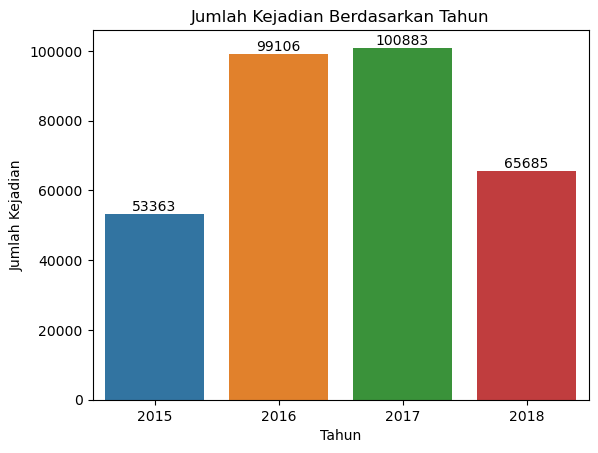

In [156]:
bp_year_IN = sns.barplot(data=df_gb_YEAR_INCBER, x='YEAR', y='INCIDENT_NUMBER', ci=False)
for i in bp_year_IN.containers:
    bp_year_IN.bar_label(i,)

# plt.xlim(0, 110000)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Berdasarkan Tahun')

plt.show()

In [157]:
# melihat jumlah perubahan kasus berdasarkan jumlah

df_gb_YEAR_INCBER['Perubahan'] = df_gb_YEAR_INCBER['INCIDENT_NUMBER'].diff()
df_gb_YEAR_INCBER

,YEAR,INCIDENT_NUMBER,Perubahan
0,2015,53363,NaN
1,2016,99106,45743.0
2,2017,100883,1777.0
3,2018,65685,-35198.0


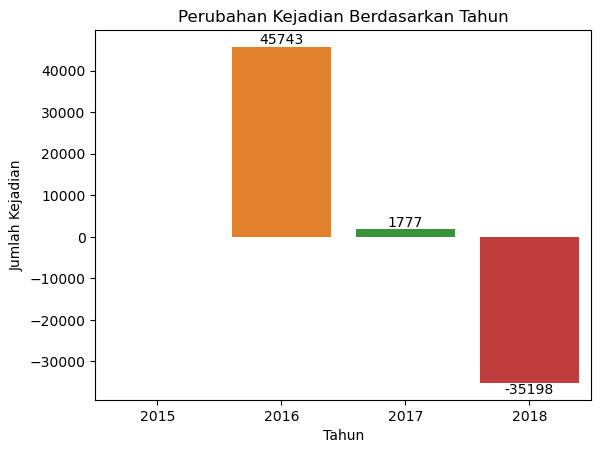

In [158]:
Y_Diff = sns.barplot(data=df_gb_YEAR_INCBER, x='YEAR', y='Perubahan', ci=False)
for i in Y_Diff.containers:
    Y_Diff.bar_label(i,)

# plt.xlim(0, 50000)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.title('Perubahan Kejadian Berdasarkan Tahun')

plt.show()

In [160]:
# melihat jumlah perubahan kasus berdasarkan persentase

df_gb_YEAR_INCBER['Persentase'] = df_gb_YEAR_INCBER['INCIDENT_NUMBER'].pct_change()*100
df_gb_YEAR_INCBER

,YEAR,INCIDENT_NUMBER,Perubahan,Persentase
0,2015,53363,NaN,NaN
1,2016,99106,45743.0,85.720443
2,2017,100883,1777.0,1.793030
3,2018,65685,-35198.0,-34.889922


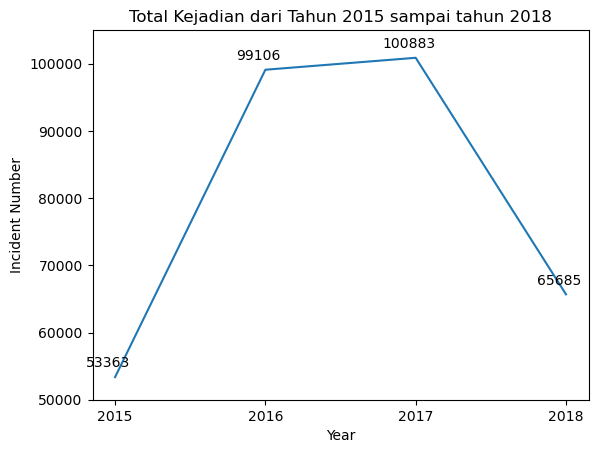

In [161]:
# buat line plot
plt.plot(df_gb_YEAR_INCBER['YEAR'],df_gb_YEAR_INCBER['INCIDENT_NUMBER'])

# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_INCBER['YEAR'],df_gb_YEAR_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(50000, 105000)
plt.xlabel('Year')
plt.ylabel('Incident Number')
plt.title('Total Kejadian dari Tahun 2015 sampai tahun 2018')
plt.xticks(df_gb_YEAR_INCBER['YEAR'].astype(int))
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

**Summary**
 
* tingkat kejadian tertinggi ada pada tahun 2017 sebanyak 100.883 kejadian.
* dari tahun 2015 ke 2016 memiliki tingkat penambahan kejadian yang sangat tinggi yaitu 45.726 atau 85.65 % dibandingkan dengan tahun sebelumnya (kemungkinan karena tahun 2015 mulai dari bulan 6).    
* dari tahun 2016 ke 2017 memiliki tingkat penambahan kejadian yaitu 1.772 atau 1.79 %.  
* dan dari tahun 2017 ke 2018 memiliki tingkat penurunan kejadian sebesar 35.201 atau 34.89% (kemungkinan karena tahun 2018 berakhir di bulan 9).  

### Selanjutnya mari kita lihat berdasarkan `Quarter`

In [162]:
# melihat jumlah kejadian berdasarkan bulan

df_gb_YEAR_Quarter_INCBER = df_crime.groupby(['YEAR', 'Quarter'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_Quarter_INCBER

,YEAR,Quarter,INCIDENT_NUMBER
0,2015,2,4188
1,2015,3,25070
2,2015,4,24105
3,2016,1,23337
4,2016,2,25237
5,2016,3,26077
6,2016,4,24455
7,2017,1,23578
8,2017,2,25769
9,2017,3,27221


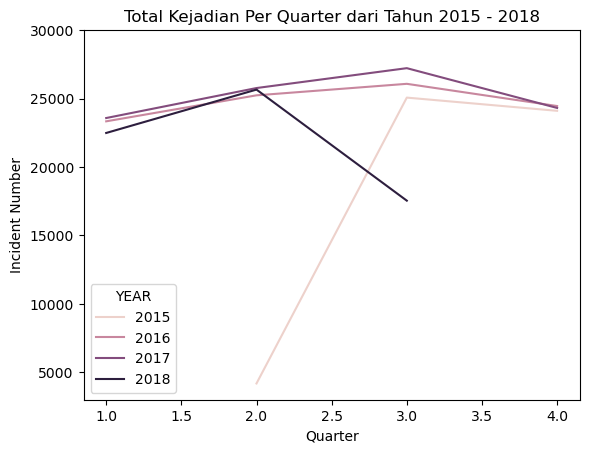

In [163]:
sns.lineplot(data=df_gb_YEAR_Quarter_INCBER, x= 'Quarter', y='INCIDENT_NUMBER', hue='YEAR')
# for i, j in zip(df_gb_YEAR_Quarter_INCBER['Quarter'],df_gb_YEAR_Quarter_INCBER['INCIDENT_NUMBER']):
#     plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(3000, 30000)
plt.xlabel('Quarter')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Quarter dari Tahun 2015 - 2018')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [164]:
# Quarter 1

df_gb_YEAR_Quarter_1_INCBER = df_crime[df_crime['YEAR']==2015].groupby(['YEAR', 'Quarter'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_Quarter_1_INCBER

,YEAR,Quarter,INCIDENT_NUMBER
0,2015,2,4188
1,2015,3,25070
2,2015,4,24105


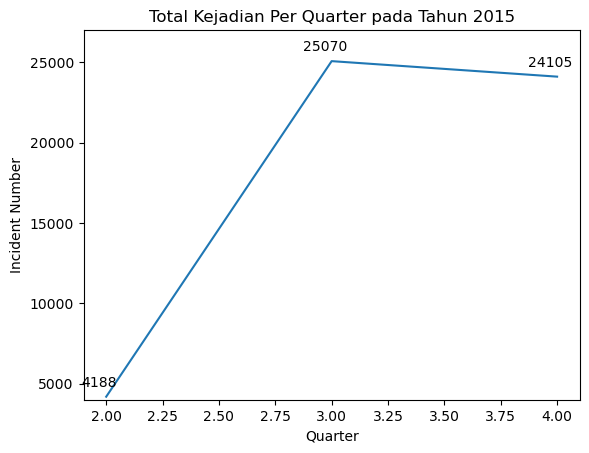

In [165]:
sns.lineplot(data=df_gb_YEAR_Quarter_1_INCBER, x= 'Quarter', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_Quarter_1_INCBER['Quarter'],df_gb_YEAR_Quarter_1_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(4000, 27000)
plt.xlabel('Quarter')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Quarter pada Tahun 2015')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [166]:
# Quarter 2

df_gb_YEAR_Quarter_2_INCBER = df_crime[df_crime['YEAR']==2016].groupby(['YEAR', 'Quarter'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_Quarter_2_INCBER

,YEAR,Quarter,INCIDENT_NUMBER
0,2016,1,23337
1,2016,2,25237
2,2016,3,26077
3,2016,4,24455


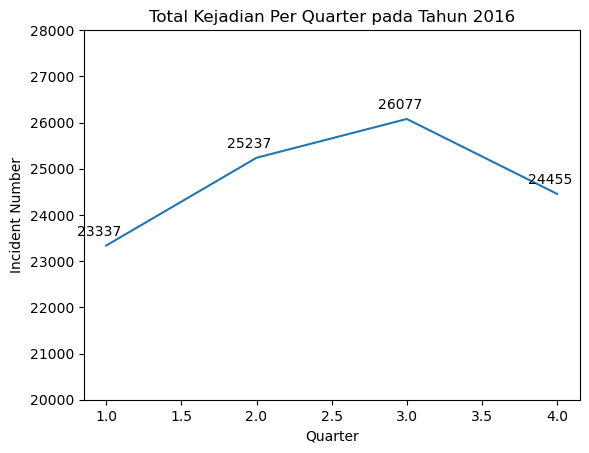

In [167]:
sns.lineplot(data=df_gb_YEAR_Quarter_2_INCBER, x= 'Quarter', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_Quarter_2_INCBER['Quarter'],df_gb_YEAR_Quarter_2_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(20000, 28000)
plt.xlabel('Quarter')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Quarter pada Tahun 2016')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [168]:
# Quarter 3

df_gb_YEAR_Quarter_3_INCBER = df_crime[df_crime['YEAR']==2017].groupby(['YEAR', 'Quarter'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_Quarter_3_INCBER

,YEAR,Quarter,INCIDENT_NUMBER
0,2017,1,23578
1,2017,2,25769
2,2017,3,27221
3,2017,4,24315


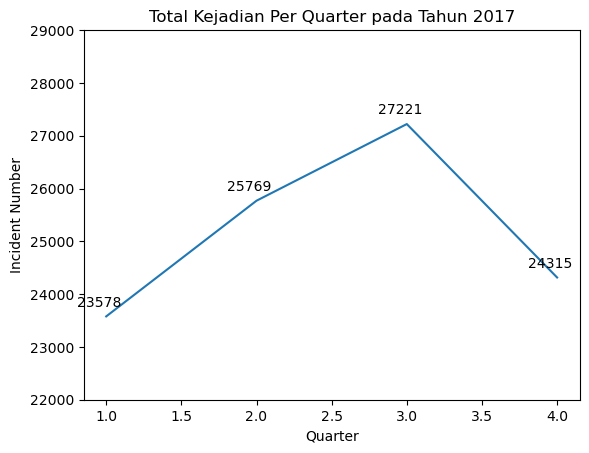

In [169]:
sns.lineplot(data=df_gb_YEAR_Quarter_3_INCBER, x= 'Quarter', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_Quarter_3_INCBER['Quarter'],df_gb_YEAR_Quarter_3_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(22000, 29000)
plt.xlabel('Quarter')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Quarter pada Tahun 2017')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [170]:
# Quarter 4

df_gb_YEAR_Quarter_4_INCBER = df_crime[df_crime['YEAR']==2018].groupby(['YEAR', 'Quarter'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_Quarter_4_INCBER

,YEAR,Quarter,INCIDENT_NUMBER
0,2018,1,22487
1,2018,2,25656
2,2018,3,17542


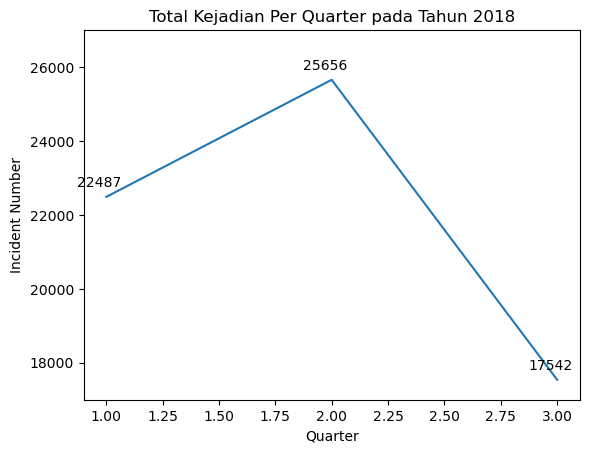

In [171]:
sns.lineplot(data=df_gb_YEAR_Quarter_4_INCBER, x= 'Quarter', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_Quarter_4_INCBER['Quarter'],df_gb_YEAR_Quarter_4_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(17000, 27000)
plt.xlabel('Quarter')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Quarter pada Tahun 2018')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

**Summary**

Terlihat secara quarter bahwa kejadian tertinggi ada di quarter 3 dengan kejadian tertinggi 27.221 kejadian pada tahun 2017

### Selanjutnya mari kita lihat berdasarkan bulan (`MONTH`)

In [172]:
# melihat jumlah kejadian berdasarkan bulan

df_gb_YEAR_MONTH_INCBER = df_crime.groupby(['YEAR', 'MONTH'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_MONTH_INCBER

,YEAR,MONTH,INCIDENT_NUMBER
0,2015,6,4188
1,2015,7,8320
2,2015,8,8339
3,2015,9,8411
4,2015,10,8302
5,2015,11,7818
6,2015,12,7985
7,2016,1,7833
8,2016,2,7305
9,2016,3,8199


In [173]:
df_gb_YEAR_2015_MONTH_INCBER = df_crime[df_crime['YEAR'] == 2015].groupby(['MONTH'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_2015_MONTH_INCBER

,MONTH,INCIDENT_NUMBER
0,6,4188
1,7,8320
2,8,8339
3,9,8411
4,10,8302
5,11,7818
6,12,7985


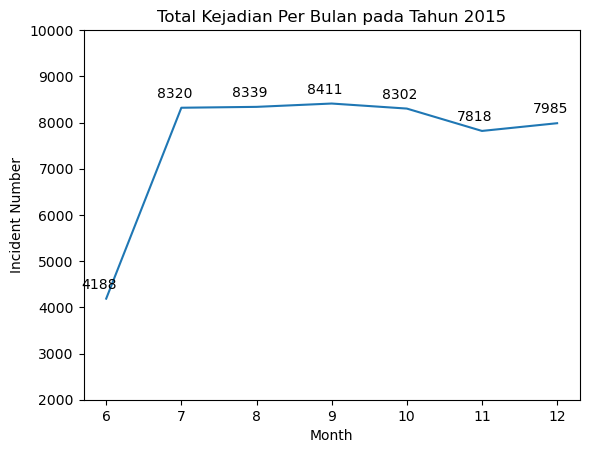

In [174]:
sns.lineplot(data=df_gb_YEAR_2015_MONTH_INCBER, x= 'MONTH', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_2015_MONTH_INCBER['MONTH'],df_gb_YEAR_2015_MONTH_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(2000, 10000)
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Bulan pada Tahun 2015')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [175]:
df_gb_YEAR_2016_MONTH_INCBER = df_crime[df_crime['YEAR'] == 2016].groupby(['MONTH'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_2016_MONTH_INCBER

,MONTH,INCIDENT_NUMBER
0,1,7833
1,2,7305
2,3,8199
3,4,8101
4,5,8578
5,6,8558
6,7,8618
7,8,8938
8,9,8521
9,10,8582


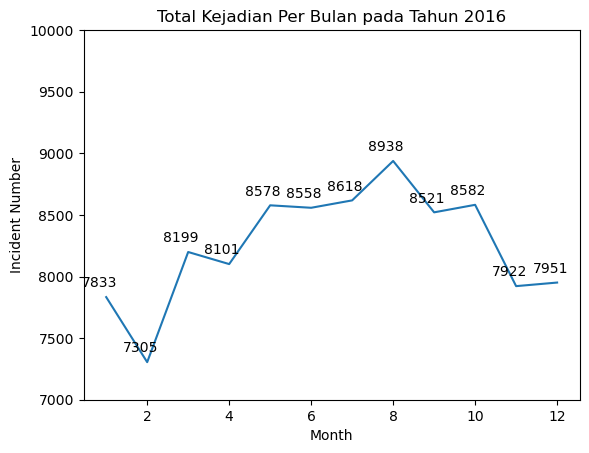

In [176]:
sns.lineplot(data=df_gb_YEAR_2016_MONTH_INCBER, x= 'MONTH', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_2016_MONTH_INCBER['MONTH'],df_gb_YEAR_2016_MONTH_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(7000, 10000)
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Bulan pada Tahun 2016')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [177]:
df_gb_YEAR_2017_MONTH_INCBER = df_crime[df_crime['YEAR'] == 2017].groupby(['MONTH'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_2017_MONTH_INCBER

,MONTH,INCIDENT_NUMBER
0,1,7991
1,2,7408
2,3,8179
3,4,8069
4,5,8715
5,6,8985
6,7,9075
7,8,9206
8,9,8940
9,10,8845


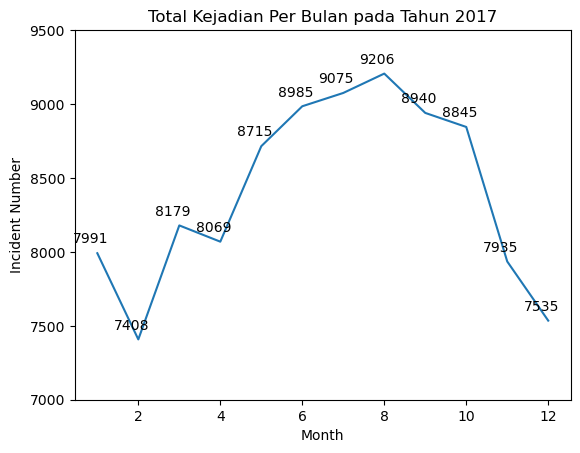

In [178]:
sns.lineplot(data=df_gb_YEAR_2017_MONTH_INCBER, x= 'MONTH', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_2017_MONTH_INCBER['MONTH'],df_gb_YEAR_2017_MONTH_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(7000, 9500)
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Bulan pada Tahun 2017')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

In [179]:
df_gb_YEAR_2018_MONTH_INCBER = df_crime[df_crime['YEAR'] == 2018].groupby(['MONTH'])['INCIDENT_NUMBER'].count().reset_index()
df_gb_YEAR_2018_MONTH_INCBER

,MONTH,INCIDENT_NUMBER
0,1,7782
1,2,6937
2,3,7768
3,4,7916
4,5,8906
5,6,8834
6,7,8538
7,8,8337
8,9,667


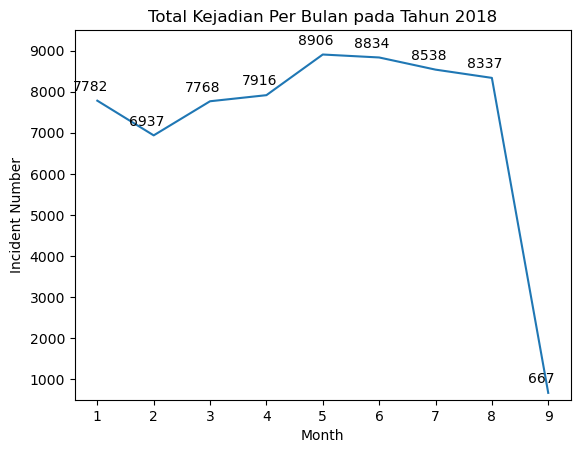

In [180]:
sns.lineplot(data=df_gb_YEAR_2018_MONTH_INCBER, x= 'MONTH', y='INCIDENT_NUMBER')
# Tambahkan annotasi pada setiap titik
for i, j in zip(df_gb_YEAR_2018_MONTH_INCBER['MONTH'],df_gb_YEAR_2018_MONTH_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(500, 9500)
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Bulan pada Tahun 2018')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

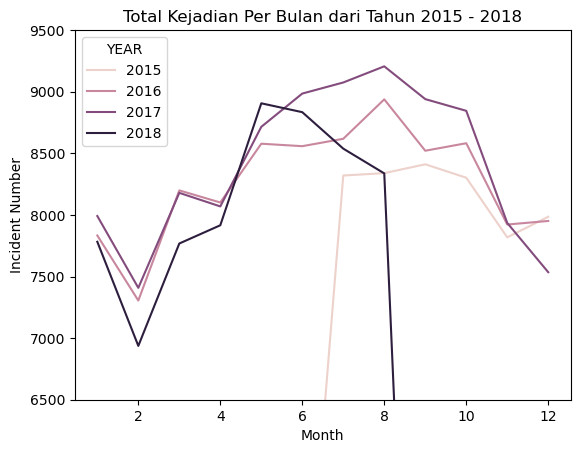

In [181]:
sns.lineplot(data=df_gb_YEAR_MONTH_INCBER, x= 'MONTH', y='INCIDENT_NUMBER', hue='YEAR')
# for i, j in zip(df_gb_YEAR_MONTH_INCBER['MONTH'],df_gb_YEAR_MONTH_INCBER['INCIDENT_NUMBER']):
#     plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(6500, 9500)
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Total Kejadian Per Bulan dari Tahun 2015 - 2018')
plt.ticklabel_format(useOffset=False) # biar scientific notationnya gak keluar

plt.show()

**Summary**
Berdasarkan hasil visualisasi diatas, terlihat bahwa dari tahun 2015 - 2018 puncak banyaknya kejadian berada diantara bulan 5 hingga bulan 10, dengan puncak tertinggi di tahun 2017 yaitu 9.206 kejadian

### Selanjutnya kita lihat berdasarkan hari (`DAYS_of_WEEK`)

In [182]:
# melihat jumlah kejadian berdasarkan hari
df_gb_DAYS_INCBER = df_crime.groupby(['DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().reset_index()

df_gb_DAYS_INCBER

,DAY_OF_WEEK,INCIDENT_NUMBER
0,Friday,48488
1,Monday,45669
2,Saturday,44815
3,Sunday,40312
4,Thursday,46655
5,Tuesday,46374
6,Wednesday,46724


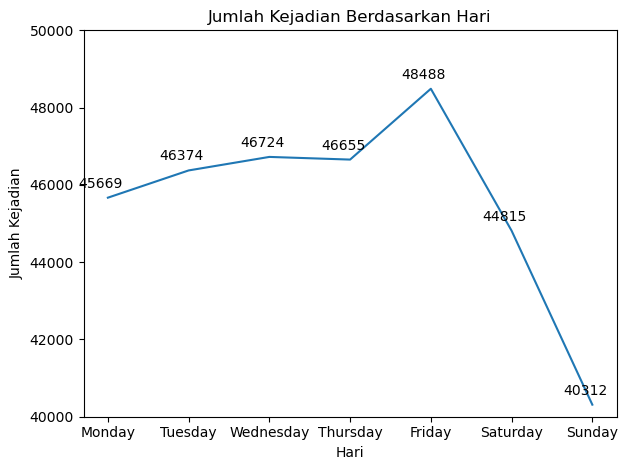

In [184]:
# Create data
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_gb_DAYS_INCBER['DAY_OF_WEEK'] = pd.Categorical(df_gb_DAYS_INCBER['DAY_OF_WEEK'], categories=days, ordered=True)

# Plot barplot
bp_day = sns.lineplot(data=df_gb_DAYS_INCBER, x= 'DAY_OF_WEEK', y='INCIDENT_NUMBER')
for i, j in zip(df_gb_DAYS_INCBER['DAY_OF_WEEK'],df_gb_DAYS_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(40000, 50000)
plt.xlabel('Hari')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Berdasarkan Hari')

# Show plot
plt.tight_layout()
plt.show()

**Summary**
Berdasarkan hasil visualisasi data di atas, tidak ada perbedaan yang signifikan dalam kejadian perharinya, hanya terlihat disini bahwa tingkat kejadian paling tinggi berada di hari jumat sebanyak 48.488 kejadian dan minggu adalah kasus terendah sebanyak 40.312 kasus.

### Dan terakhir kita lihat berdasarkan Jam (`HOUR`)

In [185]:
# melihat jumlah kejadian berdasarkan jam

df_gb_HOUR_INCBER = df_crime.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()
df_gb_HOUR_INCBER

,HOUR,INCIDENT_NUMBER
0,0,15106
1,1,9266
2,2,7693
3,3,4589
4,4,3408
5,5,3311
6,6,5026
7,7,8850
8,8,13042
9,9,14738


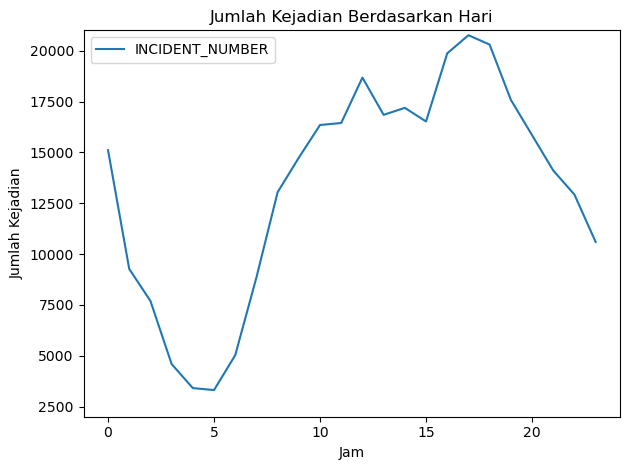

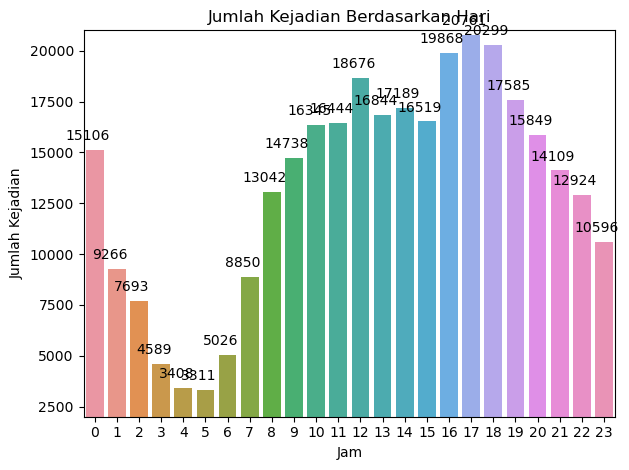

In [186]:
df_gb_HOUR_INCBER.plot.line(x='HOUR', y=('INCIDENT_NUMBER'))
plt.ylim(2000, 21000)
plt.xlabel('Jam')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Berdasarkan Hari')
plt.xticks(rotation=0)
# Show plot
plt.tight_layout()
plt.show()

sns.barplot(data=df_gb_HOUR_INCBER, x= 'HOUR', y='INCIDENT_NUMBER')
for i, j in zip(df_gb_HOUR_INCBER['HOUR'],df_gb_HOUR_INCBER['INCIDENT_NUMBER']):
    plt.annotate(str(j), (i, j), xytext=(-5, 5), textcoords='offset points', ha='center', va='bottom')

plt.ylim(2000, 21000)
plt.xlabel('Jam')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Berdasarkan Hari')
plt.xticks(rotation=0)
# Show plot
plt.tight_layout()
plt.show()

**Summary**

Berdasarkan hasil visualisasi di atas bahwa jam rawan kejadian di kota Boston berada di antara jam 9 pagi sampai dengan jam 8 malam dan juga jam 12 malam dengan puncak kejadian di jam 17.00 dengan jumlah kejadian 20.761 kali dan kejadian terendah di jam 5 sore sebanyak 3.311 kasus.

## Berdasarkan Kejadian (`INCIDENT_NUMBER`)
Pertama mari kita lihat jumlah kejahatan secara keseluruhan. kita gunakan kolom `INCIDENT_NUMBER` dan `OFFENSE_CODE_GROUP` untuk menjawab beberapa pertanyaan:
* Kejadian apa saja yang sering terjadi

In [189]:
# Kejadian yang sering terjadi berdasarkan kelompok kode pelanggaran

df_gb_OCG_INCBER = df_crime.groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_OCG_INCBER.head()

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
43,Motor Vehicle Accident Response,37132
34,Larceny,25933
40,Medical Assistance,23540
31,Investigate Person,18746
46,Other,18073


In [190]:
# melihat persentase dari setiap kejadian

df_gb_OCG_INCBER['Persentase'] = df_gb_OCG_INCBER['INCIDENT_NUMBER']/df_gb_OCG_INCBER['INCIDENT_NUMBER'].sum()*100
df_gb_OCG_INCBER

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,Persentase
43,Motor Vehicle Accident Response,37132,11.638775
34,Larceny,25933,8.128524
40,Medical Assistance,23540,7.378455
31,Investigate Person,18746,5.875808
46,Other,18073,5.664860
...,...,...,...
25,HUMAN TRAFFICKING,7,0.002194
30,INVESTIGATE PERSON,3,0.000940
7,Biological Threat,2,0.000627
9,Burglary - No Property Taken,2,0.000627


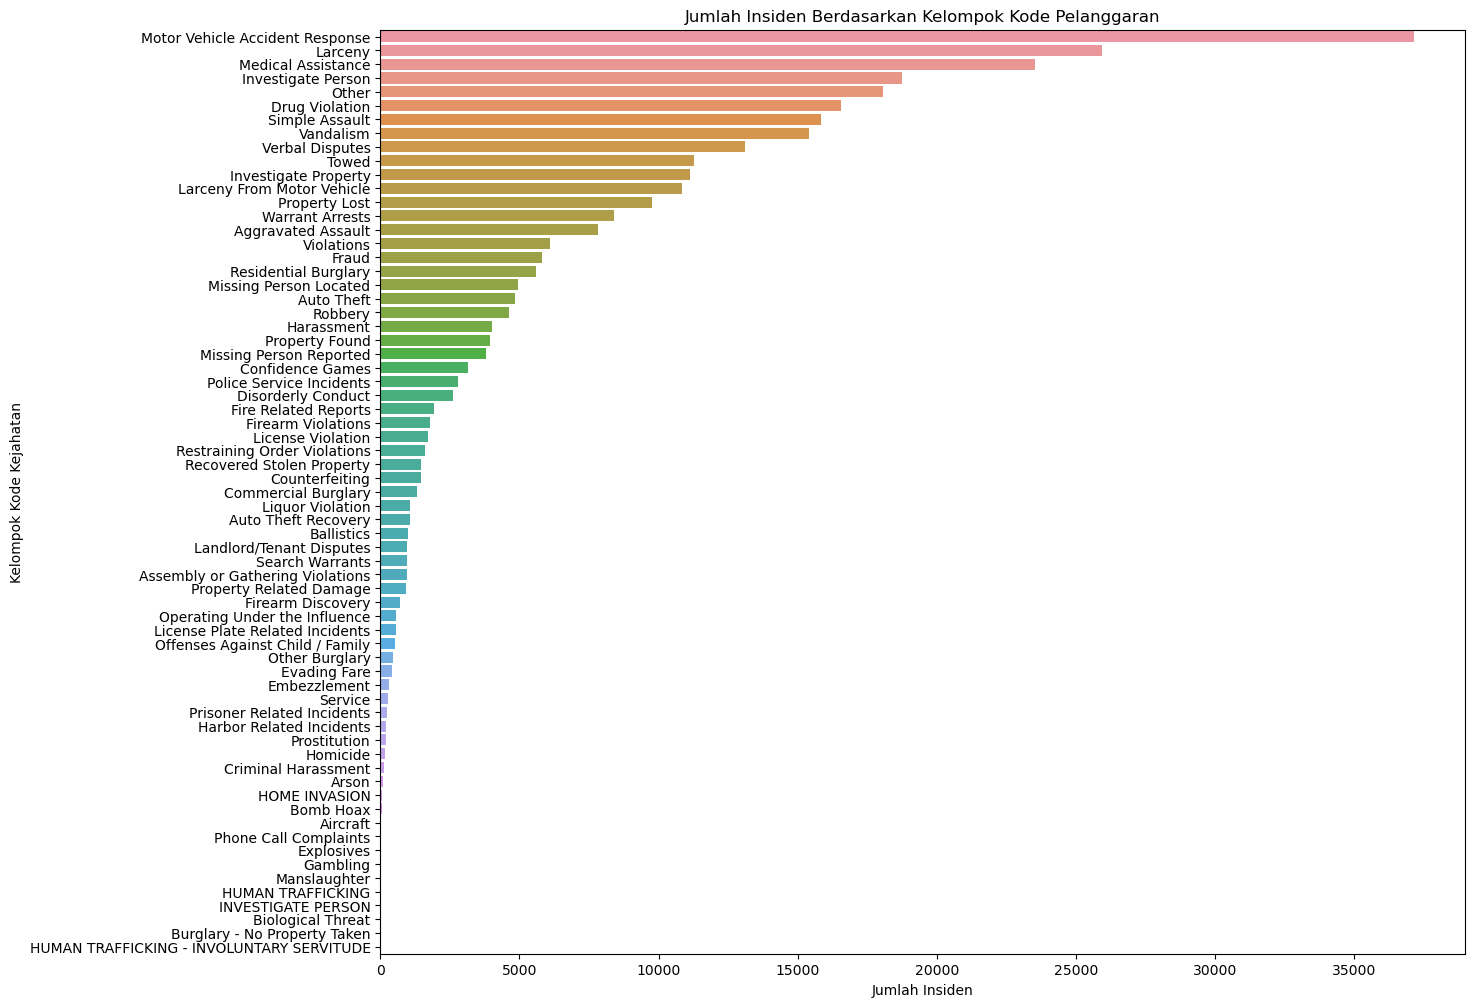

In [191]:
plt.figure(figsize=(14,12))
sns.barplot(y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', data=df_gb_OCG_INCBER)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Kelompok Kode Kejahatan')
plt.title('Jumlah Insiden Berdasarkan Kelompok Kode Pelanggaran')

plt.show()


In [192]:
# 10 Kejadian paling banyak terjadi, dibagi berdasarkan group kejadiannya

df_gb_OCG_INCBER.sort_values('INCIDENT_NUMBER',ascending=False).head(10)


,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,Persentase
43,Motor Vehicle Accident Response,37132,11.638775
34,Larceny,25933,8.128524
40,Medical Assistance,23540,7.378455
31,Investigate Person,18746,5.875808
46,Other,18073,5.664860
15,Drug Violation,16544,5.185605
61,Simple Assault,15824,4.959926
63,Vandalism,15414,4.831415
64,Verbal Disputes,13099,4.105793
62,Towed,11287,3.537834


In [193]:
print('10 kejadian tertinggi yang terjadi berjumlah', df_gb_OCG_INCBER.sort_values('INCIDENT_NUMBER',ascending=False).head(10)['INCIDENT_NUMBER'].sum(), 'Kejadian')

print('10 kejadian tertinggi yang terjadi memiliki proporsi', round(df_gb_OCG_INCBER.sort_values('Persentase',ascending=False).head(10)['Persentase'].sum(),2),'% dari total keseluruhan kejahatan')

10 kejadian tertinggi yang terjadi berjumlah 195592 Kejadian
10 kejadian tertinggi yang terjadi memiliki proporsi 61.31 % dari total keseluruhan kejahatan


In [194]:
# 10 Kejadian paling jarang terjadi, dibagi berdasarkan group kejahatannya

df_gb_OCG_INCBER.sort_values('INCIDENT_NUMBER',ascending=True).head(10)

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,Persentase
26,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,2,0.000627
9,Burglary - No Property Taken,2,0.000627
7,Biological Threat,2,0.000627
30,INVESTIGATE PERSON,3,0.000940
25,HUMAN TRAFFICKING,7,0.002194
39,Manslaughter,8,0.002508
23,Gambling,8,0.002508
18,Explosives,27,0.008463
48,Phone Call Complaints,31,0.009717
1,Aircraft,36,0.011284


In [195]:
print('10 kejadian terendah yang terjadi berjumlah', df_gb_OCG_INCBER.sort_values('INCIDENT_NUMBER').head(10)['INCIDENT_NUMBER'].sum(), 'Kejadian')

print('10 kejadian terendah yang terjadi memiliki proporsi', round(df_gb_OCG_INCBER.sort_values('Persentase').head(10)['Persentase'].sum(),2),'% dari total keseluruhan kejahatan')

10 kejadian terendah yang terjadi berjumlah 126 Kejadian
10 kejadian terendah yang terjadi memiliki proporsi 0.04 % dari total keseluruhan kejahatan


In [196]:
# Membuat group 10 kejadian tertinggi

df_gb_OCG_INCBER_top_10 = df_gb_OCG_INCBER.sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_OCG_INCBER_top_10

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,Persentase
43,Motor Vehicle Accident Response,37132,11.638775
34,Larceny,25933,8.128524
40,Medical Assistance,23540,7.378455
31,Investigate Person,18746,5.875808
46,Other,18073,5.664860
15,Drug Violation,16544,5.185605
61,Simple Assault,15824,4.959926
63,Vandalism,15414,4.831415
64,Verbal Disputes,13099,4.105793
62,Towed,11287,3.537834


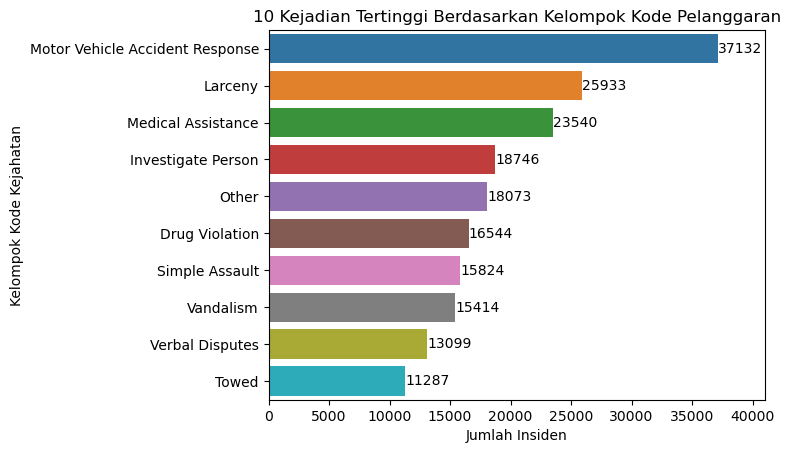

In [197]:
# Membuat barplot
bp1 = sns.barplot(y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', data=df_gb_OCG_INCBER_top_10)
for i in bp1.containers:
    bp1.bar_label(i,)
    
plt.xlim(0, 41000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Kelompok Kode Kejahatan')
plt.title('10 Kejadian Tertinggi Berdasarkan Kelompok Kode Pelanggaran')

plt.show()

**Summary**

Bisa dilihat bahwa Motor Vehicle Accident Respone merupakan kejadian paling tinggi yang direspon oleh Departement Kepolisian Boston, dimana terjadi 37.132 kejadian atau 11.64% dari total seluruh kejadian sepanjang tahun 2015 - 2018, di ikuti oleh Larceny sebanyak 25.933 kejadian (8.13%), dan yang ketiga adalah Medical Assistance sebanyak 23.540 kali (7.37%).

selain itu bisa kita lihat juga bahwa Motor Vehicle Accident Response, Larceny, dan Medical Assistance merupakan 3 kelompok kejadian tertinggi di Kota Boston.  

Selanjutnya mari kita lihat deskripsi kejadian apa saja yang terjadi berdasarkan 3 kelompok tertinggi

## Berdasarkan `OFFENSE_DESCRIPTION`

In [199]:
# Kejadian yang sering terjadi berdasarkan kelompok kode pelanggaran
df_gb_OD_INCBER = df_crime.groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False).head()

# melihat persentase dari setiap kejadian
df_gb_OD_INCBER['Persentase'] = df_gb_OD_INCBER['INCIDENT_NUMBER']/df_gb_OD_INCBER['INCIDENT_NUMBER'].sum()*100

df_gb_OD_INCBER.head()

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER,Persentase
212,SICK/INJURED/MEDICAL - PERSON,18783,22.414616
119,INVESTIGATE PERSON,18749,22.374042
152,M/V - LEAVING SCENE - PROPERTY DAMAGE,16323,19.478985
227,VANDALISM,15153,18.082770
19,ASSAULT SIMPLE - BATTERY,14790,17.649586


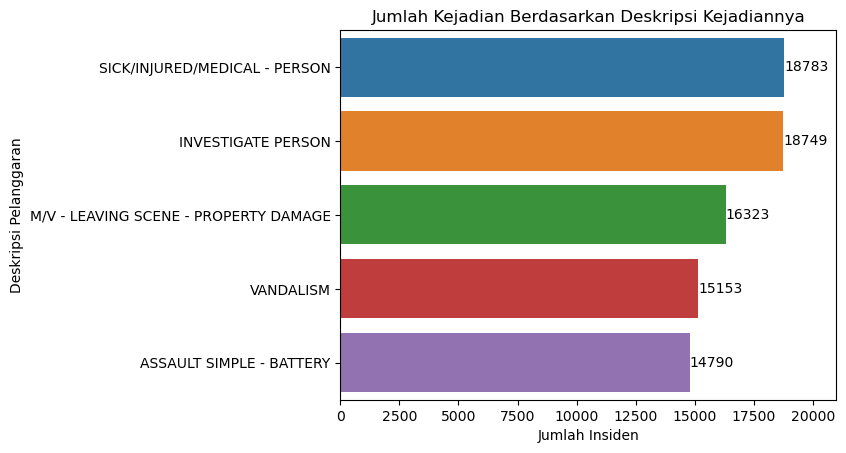

In [200]:
bp_od = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=df_gb_OD_INCBER.head(10))
for i in bp_od.containers:
    bp_od.bar_label(i,)

plt.xlim(0, 21000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian Berdasarkan Deskripsi Kejadiannya')
plt.xticks(rotation=0)

plt.show()

**Summary**

Jumlah kejadian tertinggi berdasarkan deskripsinya adalah Sick / Injured / Medical - Person dengan jumlah total 18.783 kejadian selama 2015 - 2018, diikuti oleh Investigate Person sebanyak 18.749 kejadian, dan yang ketiga adalah Motor Vehicle Scene - Property Damage sebanyak 16.323

In [201]:
# berdasarkan Grup Motor Vehicle Accident Response

df_gb_OCG_1_OD_INCBER = df_crime[df_crime['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_OCG_1_OD_INCBER

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,16323
9,M/V ACCIDENT - PROPERTY DAMAGE,6557
7,M/V ACCIDENT - PERSONAL INJURY,5131
5,M/V ACCIDENT - OTHER,2925
10,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,1656
0,M/V - LEAVING SCENE - PERSONAL INJURY,1286
4,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,916
8,M/V ACCIDENT - POLICE VEHICLE,766
6,M/V ACCIDENT - OTHER CITY VEHICLE,732
2,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY,426


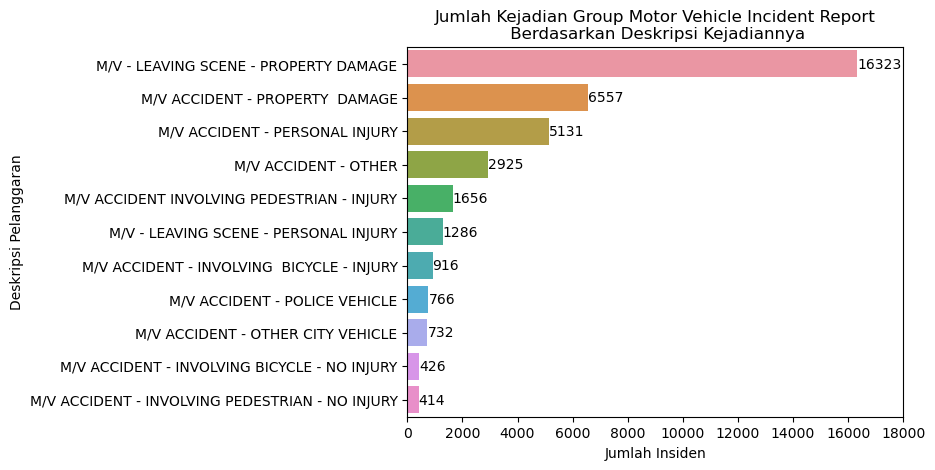

In [202]:
# Membuat barplot
bp2 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=df_gb_OCG_1_OD_INCBER)
for i in bp2.containers:
    bp2.bar_label(i,)

plt.xlim(0, 18000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian Group Motor Vehicle Incident Report\n Berdasarkan Deskripsi Kejadiannya')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok pelanggaran Motor Vehicle Accident Respone terdapat 3 deskripsi kejadian tertinggi yaitu: 
1. M/V - Leaving Scene - Property Damage sebanyak 16.323 kejadian.
2. M/V Accident - Property Damage sebanyak 6.557 kejadian.
3. M/V Accident - Personal Injury sebanyak 5.131

In [203]:
df_gb_OCG_2_OD_INCBER = df_crime[df_crime['OFFENSE_CODE_GROUP']=='Larceny'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_OCG_2_OD_INCBER

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
14,LARCENY THEFT FROM BUILDING,9068
10,LARCENY SHOPLIFTING,7949
0,LARCENY ALL OTHERS,5963
16,LARCENY THEFT OF BICYCLE,2265
8,LARCENY PICK-POCKET,455
9,LARCENY PURSE SNATCH - NO FORCE,188
15,LARCENY THEFT FROM COIN-OP MACHINE,16
5,LARCENY OTHER $200 & OVER,7
2,LARCENY IN A BUILDING $200 & OVER,5
13,LARCENY SHOPLIFTING UNDER $50,4


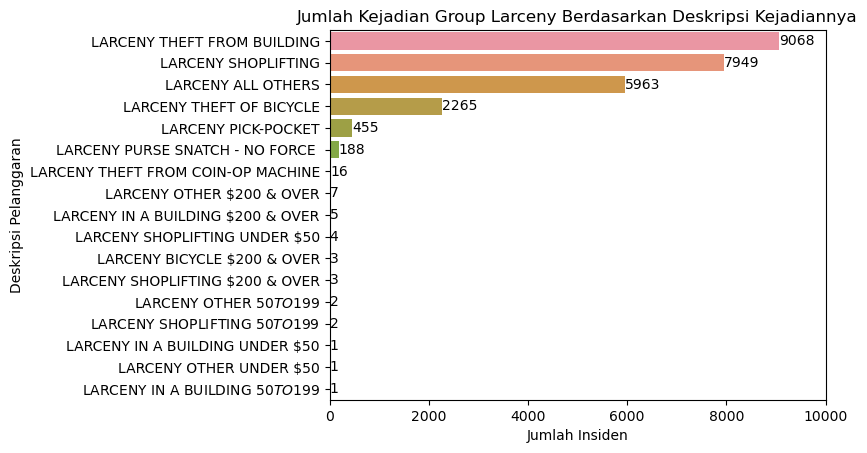

In [204]:
# Membuat barplot
bp3 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=df_gb_OCG_2_OD_INCBER)
for i in bp3.containers:
    bp3.bar_label(i,)

plt.xlim(0, 10000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian Group Larceny Berdasarkan Deskripsi Kejadiannya')
plt.xticks(rotation=0)
plt.show()


**Summary**

Pada kelompok pelanggaran Larceny terdapat 3 deskripsi kejadian tertinggi yaitu: 
1. Larceny Theft From Building sebanyak 9.068 kejadian.
2. Larceny Shoplifting sebanyak 7.949 kejadian.
3. Larceny All Others sebanyak 5.131 kejadian.

In [205]:
df_gb_OCG_3_OD_INCBER = df_crime[df_crime['OFFENSE_CODE_GROUP']=='Medical Assistance'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_OCG_3_OD_INCBER

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
4,SICK/INJURED/MEDICAL - PERSON,18783
5,SICK/INJURED/MEDICAL - POLICE,1405
6,SUDDEN DEATH,1347
1,DEATH INVESTIGATION,1215
0,ANIMAL CONTROL - DOG BITES - ETC.,367
7,SUICIDE / SUICIDE ATTEMPT,356
3,INJURY BICYCLE NO M/V INVOLVED,57
2,FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH,10


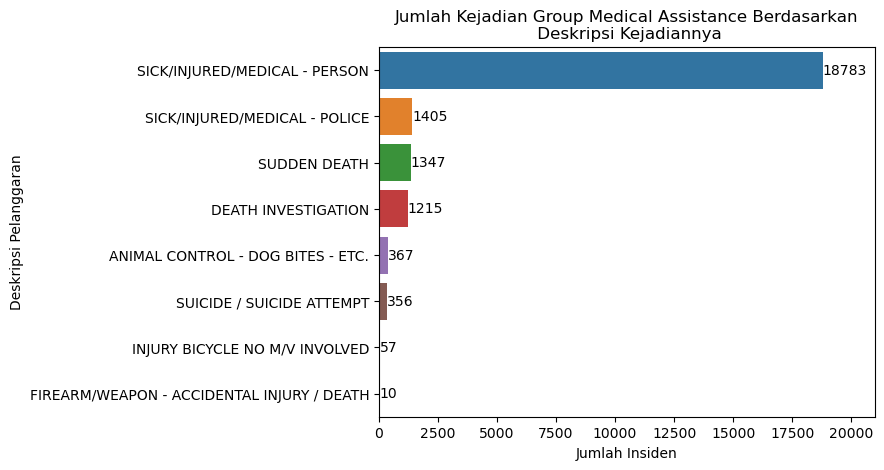

In [206]:
# Membuat barplot
bp4 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=df_gb_OCG_3_OD_INCBER)
for i in bp4.containers:
    bp4.bar_label(i,)

plt.xlim(0, 21000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian Group Medical Assistance Berdasarkan\n Deskripsi Kejadiannya')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok pelanggaran Medical Assistance terdapat 3 deskripsi kejadian tertinggi yaitu: 
1. Sick / Injured / Medical - Person sebanyak 18.783 kejadian.
2. Sick / Injured / Medical - Police sebanyak 1.405 kejadian.
3. Sudden Death sebanyak 1.347 Kejadian.

## Berdasarkan `SHOOTING`

In [207]:
df_gb_SHOOTING_INCBER = df_crime[df_crime['SHOOTING']=='Y'].groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_SHOOTING_INCBER

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
0,Aggravated Assault,523
7,Homicide,121
26,Warrant Arrests,73
5,Firearm Violations,71
1,Ballistics,42
3,Drug Violation,32
21,Search Warrants,29
11,Medical Assistance,20
20,Robbery,19
24,Vandalism,17


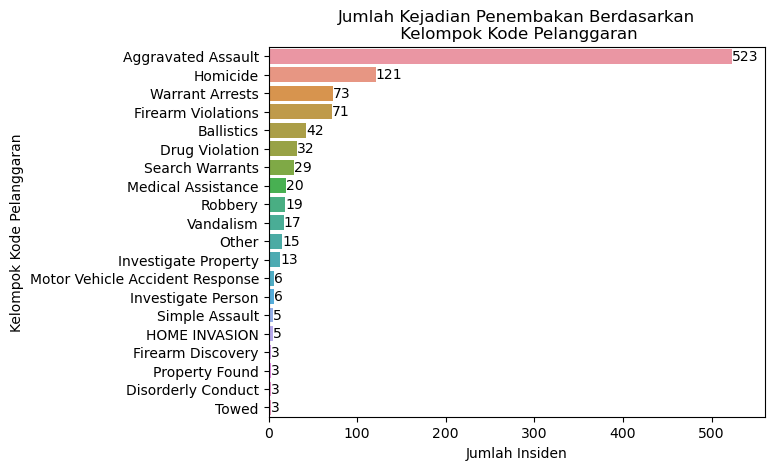

In [208]:
# Membuat barplot
bp5 = sns.barplot(y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', data=df_gb_SHOOTING_INCBER.head(20))
for i in bp5.containers:
    bp5.bar_label(i,)

plt.xlim(0, 560)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Kelompok Kode Pelanggaran')
plt.title('Jumlah Kejadian Penembakan Berdasarkan\n Kelompok Kode Pelanggaran')
plt.xticks(rotation=0)
plt.show()

**Summary**

berdasarkan data diatas, jumlah kejadian yang di ikuti oleh penembakan banyak terjadi di kelompok kode pelanggaran Aggravated Assault yaitu sebanyak 523 kejadian sepanjang tahun 2015 - 2018, diikuti oleh Homicide sebanyak 121 kejadian, dan yang ketiga adalah Warrant Arrests sebanyak 73 kejadian.

kasus Firearm Violation sendiri nyaris memiliki angka yang sama dengan Warrant Arrests yaitu sebanyak 71 kejadian.

### `SHOOTING` Berdasarkan Deskripsi Pelanggarannya

In [209]:
df_gb_SHOOTING_OD_INCBER = df_crime[df_crime['SHOOTING']=='Y'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)
df_gb_SHOOTING_OD_INCBER

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
3,ASSAULT - AGGRAVATED - BATTERY,494
30,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",121
50,WARRANT ARREST,73
51,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",48
5,BALLISTICS EVIDENCE/FOUND,42
40,SEARCH WARRANT,29
2,ASSAULT - AGGRAVATED,29
48,VANDALISM,17
52,WEAPON - FIREARM - OTHER VIOLATION,16
6,DEATH INVESTIGATION,14


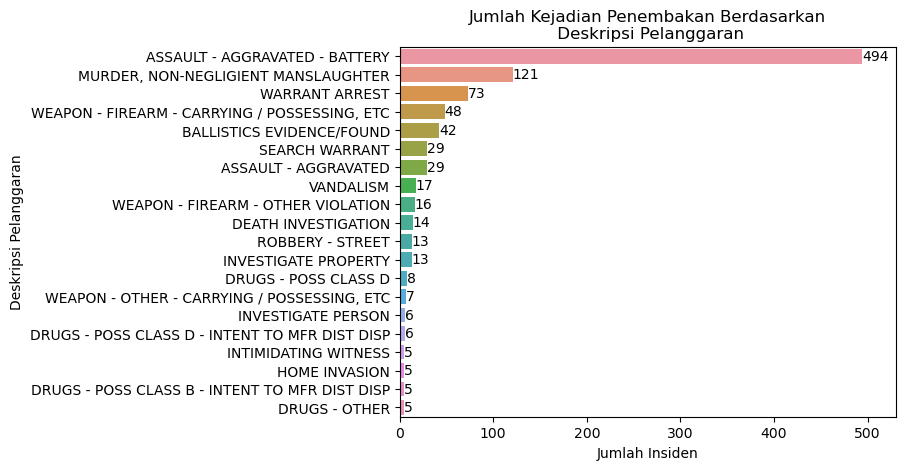

In [210]:
# Membuat barplot
bp6 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=df_gb_SHOOTING_OD_INCBER.head(20))
for i in bp6.containers:
    bp6.bar_label(i,)

plt.xlim(0, 530)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian Penembakan Berdasarkan\n Deskripsi Pelanggaran')
plt.xticks(rotation=0)
plt.show()


**Summary**

berdasarkan data diatas, jumlah kejadian yang di ikuti oleh penembakan banyak terjadi di deskripsi pelanggaran Assult - Aggravated - Battery yaitu sebanyak 494 kejadian sepanjang tahun 2015 - 2018, diikuti oleh Murder, Non-Negligient Manslaughter sebanyak 121 kejadian, dan yang ketiga adalah Warrant Arrests sebanyak 73 kejadian.

## Berdasarkan `UCR_PART`

UCR adalah singkatan dari Uniform Crime Reporting. UCR adalah sebuah program yang dikelola oleh Federal Bureau of Investigation (FBI) di Amerika Serikat yang bertujuan untuk mengumpulkan data kejahatan yang dilaporkan oleh agen polisi dari seluruh negara bagian. Data ini digunakan untuk menilai tren kejahatan dan membantu pihak berwenang mengambil tindakan yang tepat untuk meminimalisasi tingkat kejahatan. UCR juga membantu memberikan laporan statistik kejahatan yang akurat dan terpercaya untuk masyarakat dan pemerintah

In [211]:
# melihat jumlah kejadian berdasarkan UCR_PART

df_crime_grouped = df_crime.groupby('UCR_PART')['INCIDENT_NUMBER'].count().reset_index()

# Mendefinisikan urutan baris yang diinginkan
order = [1, 3, 2, 0]

# Mengurutkan baris dengan menggunakan atribut `loc`
df_gb_UCR_INCBER = df_crime_grouped.loc[df_crime_grouped.index[order]]
df_gb_UCR_INCBER


,UCR_PART,INCIDENT_NUMBER
1,Part One,61625
3,Part Two,97557
2,Part Three,158537
0,Other,1318


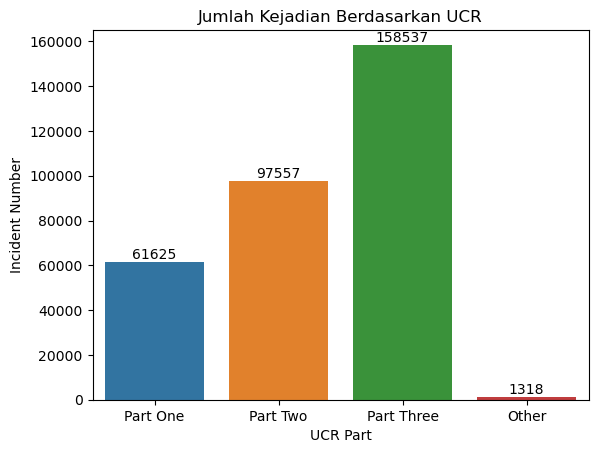

In [215]:
bp_UCR_IN = sns.barplot(x='UCR_PART', y='INCIDENT_NUMBER', data=df_gb_UCR_INCBER)
for i in bp_UCR_IN.containers:
    bp_UCR_IN.bar_label(i,)

plt.ylim(0, 165000)
plt.xlabel('UCR Part')
plt.ylabel('Incident Number')
plt.title('Jumlah Kejadian Berdasarkan UCR')
plt.xticks(rotation=0)
plt.show()

plt.show()

**Summary**

Berdasarkan Data di atas UCR Part one terjadi sebanyak 61.625 sepanjang tahun 2015 - 2018, lalu pada UCR Part two terjadi sebanyak 97.557 kejadian, dan pada UCR Part three 158.537 kejadian. Sisanya sebanyak 1.318 termasuk kedalam kategori other. 

### UCR Part One

Larceny, Larceny From Motor Vehicle, Aggravated Assault, Residential Burglary, Auto Theft, Robbery, Commercial Burglary, Other Burglary, Homicide.

In [ ]:
UCR_Part_one = df_crime[df_crime['UCR_PART']=='Part One'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False).head(10)
UCR_Part_one

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
44,LARCENY THEFT FROM BUILDING,9068
46,LARCENY THEFT FROM MV - NON-ACCESSORY,8893
40,LARCENY SHOPLIFTING,7949
27,LARCENY ALL OTHERS,5963
5,ASSAULT - AGGRAVATED - BATTERY,4886
8,AUTO THEFT,3629
56,ROBBERY - STREET,3056
4,ASSAULT - AGGRAVATED,2910
25,BURGLARY - RESIDENTIAL - FORCE,2585
26,BURGLARY - RESIDENTIAL - NO FORCE,2358


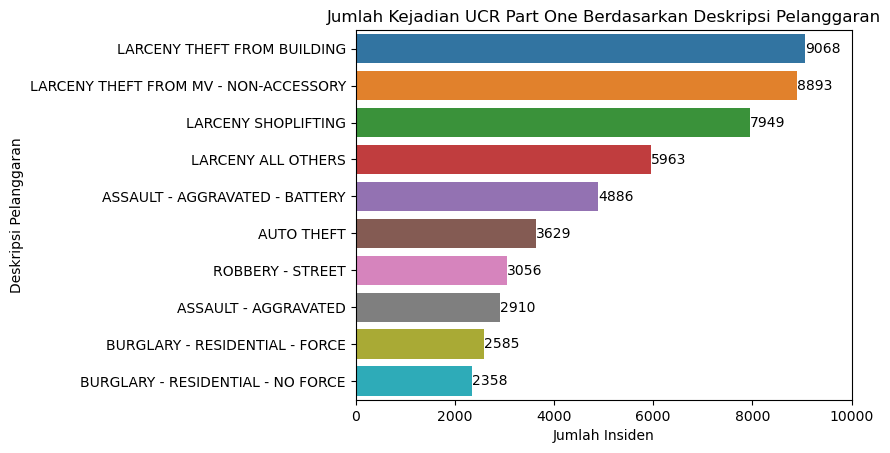

In [ ]:
bp7 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=UCR_Part_one)
for i in bp7.containers:
    bp7.bar_label(i,)

plt.xlim(0, 10000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian UCR Part One Berdasarkan Deskripsi Pelanggaran')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok kejadian UCR Part one LARCENY THEFT FROM BUILDING	terjadi sebanyak 9.068 kejadian sepanjang tahun 2015 - 2018, diikuti oleh LARCENY THEFT FROM MV - NON-ACCESSORY sebanyak 8.893 kejadian, dan yang urutan ke tiga LARCENY SHOPLIFTING terjadi sebanyak 7.949 kejadian.

### UCR Part Two

VANDALISM, ASSAULT SIMPLE - BATTERY, THREATS TO DO BODILY HARM, FRAUD - FALSE PRETENSE / SCHEME, HARASSMENT, TRESPASSING, FRAUD - CREDIT CARD / ATM FRAUD, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP, DRUGS - POSS CLASS B - COCAINE, ETC.	

In [ ]:
UCR_Part_two = df_crime[df_crime['UCR_PART']=='Part Two'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False).head(10)
UCR_Part_two

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
98,VANDALISM,15153
7,ASSAULT SIMPLE - BATTERY,14790
90,THREATS TO DO BODILY HARM,9042
60,FRAUD - FALSE PRETENSE / SCHEME,4413
68,HARASSMENT,4007
91,TRESPASSING,3252
58,FRAUD - CREDIT CARD / ATM FRAUD,3147
97,VAL - VIOLATION OF AUTO LAW - OTHER,2894
93,VAL - OPERATING AFTER REV/SUSP.,2618
32,"DRUGS - POSS CLASS B - COCAINE, ETC.",2589


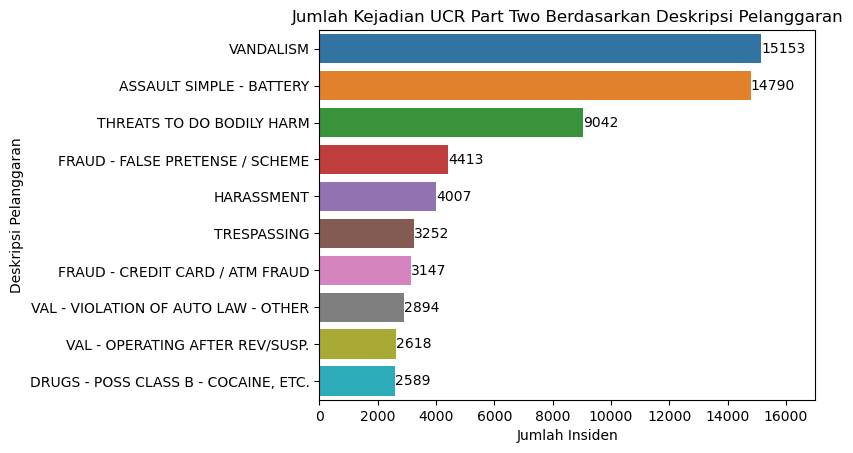

In [ ]:
bp8 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=UCR_Part_two)
for i in bp8.containers:
    bp8.bar_label(i,)

plt.xlim(0, 17000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian UCR Part Two Berdasarkan Deskripsi Pelanggaran')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok kejadian UCR Part Two Vandalism terjadi sebanyak 15.153 kejadian sepanjang tahun 2015 - 2018, diikuti oleh Assault Simple - Battery sebanyak 14.790 kejadian, dan yang urutan ke tiga Threats To Do Bodily Harm terjadi sebanyak 9.042 kejadian.

### UCR Part Three

SICK/INJURED/MEDICAL - PERSON, INVESTIGATE PERSON, M/V - LEAVING SCENE - PROPERTY DAMAGE, VERBAL DISPUTE, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, PROPERTY - LOST, WARRANT ARREST, M/V ACCIDENT - PROPERTY  DAMAGE, M/V ACCIDENT - PERSONAL INJURY	

In [ ]:
UCR_Part_three = df_crime[df_crime['UCR_PART']=='Part Three'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False).head(10)
UCR_Part_three

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
49,SICK/INJURED/MEDICAL - PERSON,18783
16,INVESTIGATE PERSON,18749
22,M/V - LEAVING SCENE - PROPERTY DAMAGE,16323
54,VERBAL DISPUTE,13099
53,TOWED MOTOR VEHICLE,11287
17,INVESTIGATE PROPERTY,11124
41,PROPERTY - LOST,8893
55,WARRANT ARREST,8392
30,M/V ACCIDENT - PROPERTY DAMAGE,6557
28,M/V ACCIDENT - PERSONAL INJURY,5131


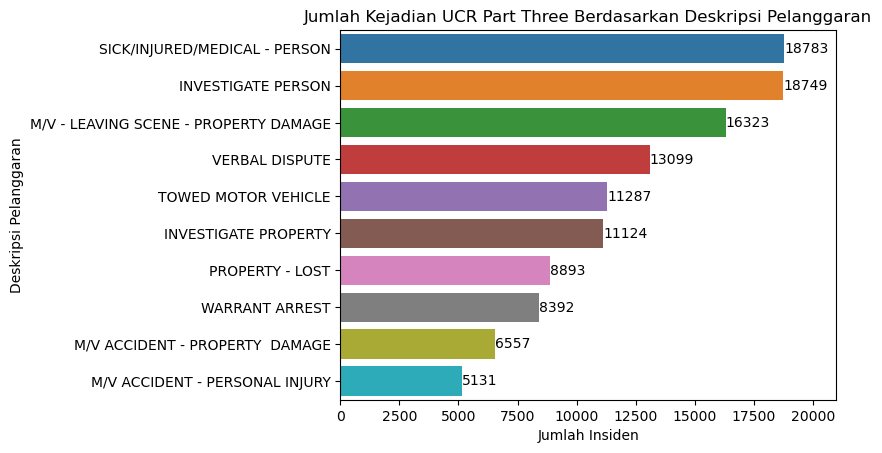

In [ ]:
bp9 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=UCR_Part_three)
for i in bp9.containers:
    bp9.bar_label(i,)

plt.xlim(0, 21000)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian UCR Part Three Berdasarkan Deskripsi Pelanggaran')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok kejadian UCR Part Three, Sick / Injured / Medical - Person terjadi sebanyak 18.783 kejadian sepanjang tahun 2015 - 2018, diikuti oleh Investigate Person sebanyak 18.749 kejadian, dan urutan ketiga M/V - Leaving Scene - Property Damage terjadi sebanyak 16.323 kejadian.

### UCR Part Other

RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON), ARSON, RECOVERED STOLEN PLATE, PROPERTY - CONCEALING LEASED, MANSLAUGHTER - VEHICLE - NEGLIGENCE, MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE, AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON, B&E NON-RESIDENCE DAY - NO PROP TAKEN, B&E RESIDENCE DAY - NO PROP TAKEN, KILLING OF FELON BY POLICE	

In [ ]:
UCR_Part_other = df_crime[df_crime['UCR_PART']=='Other'].groupby('OFFENSE_DESCRIPTION')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER',ascending=False).head(10)
UCR_Part_other

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
8,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON),1050
0,ARSON,94
9,RECOVERED STOLEN PLATE,67
7,PROPERTY - CONCEALING LEASED,10
6,MANSLAUGHTER - VEHICLE - NEGLIGENCE,5
5,MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE,2
1,AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON,1
2,B&E NON-RESIDENCE DAY - NO PROP TAKEN,1
3,B&E RESIDENCE DAY - NO PROP TAKEN,1
4,KILLING OF FELON BY POLICE,1


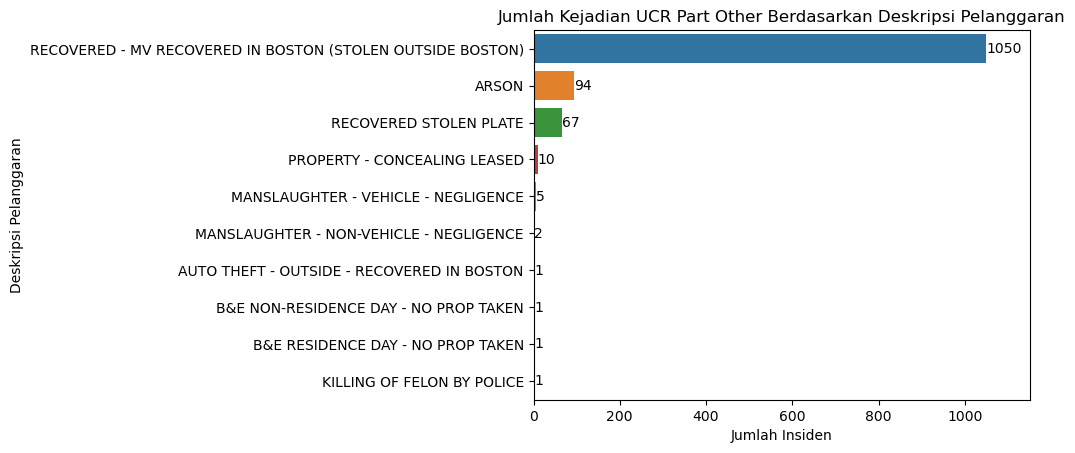

In [ ]:
bp10 = sns.barplot(y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', data=UCR_Part_other)
for i in bp10.containers:
    bp10.bar_label(i,)

plt.xlim(0, 1150)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Jumlah Kejadian UCR Part Other Berdasarkan Deskripsi Pelanggaran')
plt.xticks(rotation=0)
plt.show()

**Summary**

Pada kelompok kejadian UCR Part Other, RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON) terjadi sebanyak 1050 kejadian, lalu ARSON terjadi sebanyak 94 kejadian, dan urutan ketiga RECOVERED STOLEN PLATE terjadi sebanyak 67 kejadian sepanjang tahun 2015 - 2018.

## Berdasarkan Lokasi (`DISTRICT`, `STREET`)

### berdasarkan `DISTRICT`

In [216]:
# melihat jumlah kejadian berdasarkan DISTRICT

df_gb_DISTRICT_INCBER = df_crime.groupby('DISTRICT')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False)
df_gb_DISTRICT_INCBER

,DISTRICT,INCIDENT_NUMBER
3,B2,49939
5,C11,42526
8,D4,41910
0,A1,35708
4,B3,35439
6,C6,23456
7,D14,20127
9,E13,17533
10,E18,17347
2,A7,13544


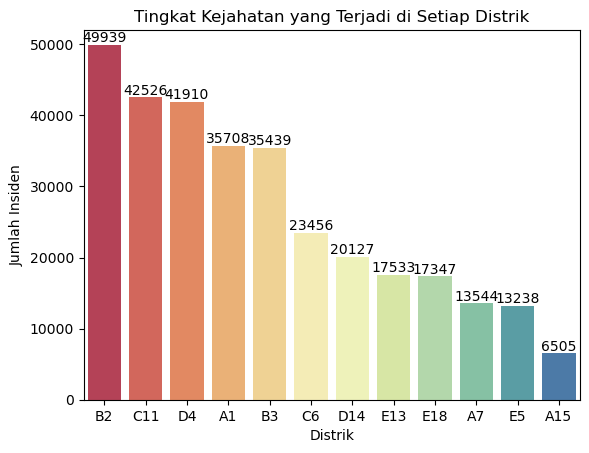

In [219]:
bp11 = sns.barplot(data=df_gb_DISTRICT_INCBER, x='DISTRICT', y='INCIDENT_NUMBER', ci=False, palette="Spectral")
for i in bp11.containers:
    bp11.bar_label(i,)

plt.ylim(0, 52000)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan yang Terjadi di Setiap Distrik')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi terjadi di distrik B2 dimana ada 49.939 kejadian, lalu diikuti distrik C11 sebanyak 42.526 kejadian dan yang ketiga adalah distrik D4 sebanyak 41.910 kejadian.

In [227]:
df_gb_DISTRICT_B2_INCBER = df_crime[df_crime['DISTRICT'] == 'B2'].groupby(['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_B2_INCBER

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
37,Motor Vehicle Accident Response,6407
34,Medical Assistance,3353
40,Other,3324
58,Verbal Disputes,3008
28,Larceny,2871
25,Investigate Person,2747
55,Simple Assault,2510
57,Vandalism,2436
12,Drug Violation,2269
26,Investigate Property,1703


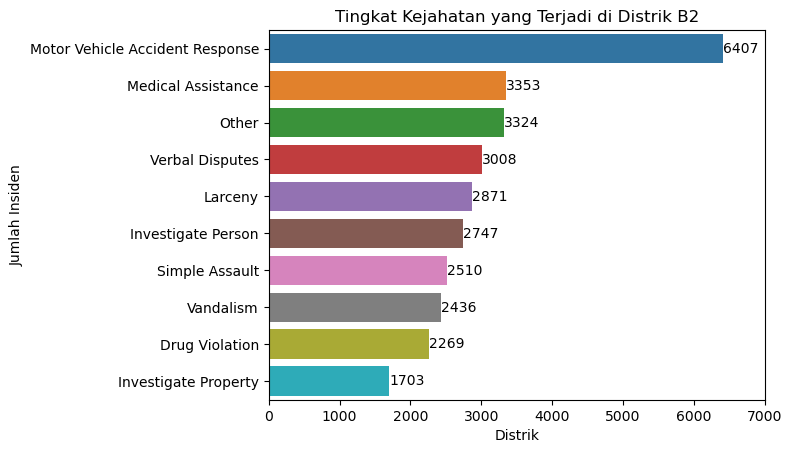

In [223]:
bp12 = sns.barplot(data=df_gb_DISTRICT_B2_INCBER, y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', ci=False)
for i in bp12.containers:
    bp12.bar_label(i,)

plt.xlim(0, 7000)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan yang Terjadi di Distrik B2')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi di distrik B2 adalah Motor Vehicle Accident Respone dimana ada 6.407 kejadian, lalu diikuti Medical Assistance sebanyak 3.352 kejadian dan yang ketiga adalah Other sebanyak 3.324 kejadian.

In [228]:
df_gb_DISTRICT_B2_INCBER_DESC = df_crime[df_crime['DISTRICT'] == 'B2'].groupby(['OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_B2_INCBER_DESC

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
183,VERBAL DISPUTE,3008
116,M/V - LEAVING SCENE - PROPERTY DAMAGE,2757
93,INVESTIGATE PERSON,2747
167,SICK/INJURED/MEDICAL - PERSON,2684
182,VANDALISM,2420
15,ASSAULT SIMPLE - BATTERY,2392
173,THREATS TO DO BODILY HARM,1775
94,INVESTIGATE PROPERTY,1703
190,WARRANT ARREST,1328
109,LARCENY THEFT FROM MV - NON-ACCESSORY,1147


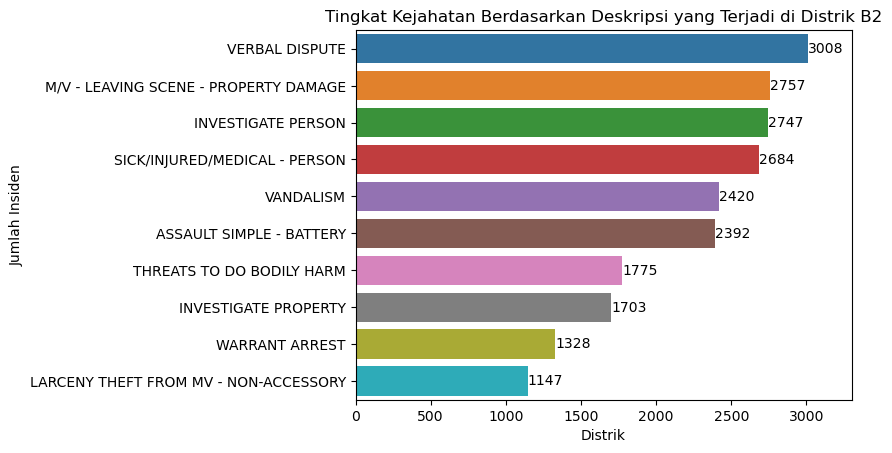

In [232]:
bp13 = sns.barplot(data=df_gb_DISTRICT_B2_INCBER_DESC, y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', ci=False)
for i in bp13.containers:
    bp13.bar_label(i,)

plt.xlim(0, 3300)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan Berdasarkan Deskripsi yang Terjadi di Distrik B2')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi berdasarkan deskripsi di distrik B2 adalah Verbal Dispute dimana ada 3.008 kejadian, lalu diikuti M/V - Leaving Scene - Property Damage sebanyak 2.757 kejadian, dan yang ketiga adalah Investigate Personsebanyak 2.747 kejadian.

In [233]:
df_gb_DISTRICT_C11_INCBER = df_crime[df_crime['DISTRICT'] == 'C11'].groupby(['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_C11_INCBER

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
38,Motor Vehicle Accident Response,5305
35,Medical Assistance,3274
26,Investigate Person,2681
58,Verbal Disputes,2617
41,Other,2436
57,Vandalism,2409
12,Drug Violation,2209
29,Larceny,2182
55,Simple Assault,2124
27,Investigate Property,1356


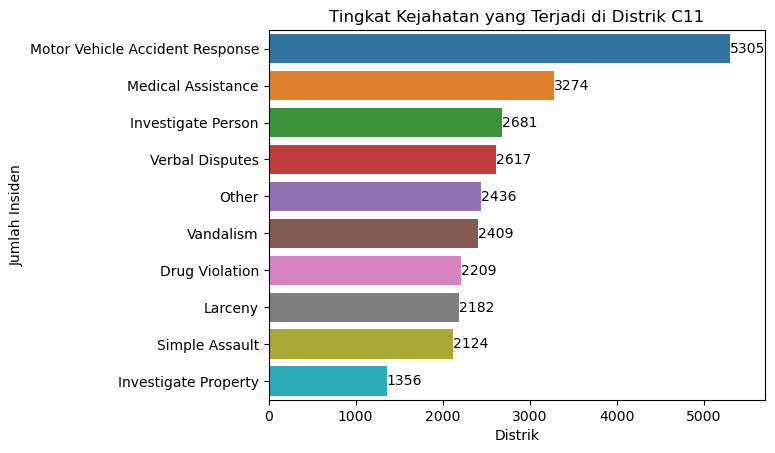

In [237]:
bp14 = sns.barplot(data=df_gb_DISTRICT_C11_INCBER, y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', ci=False)
for i in bp14.containers:
    bp14.bar_label(i,)

plt.xlim(0, 5700)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan yang Terjadi di Distrik C11')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi di distrik C11 adalah Motor Vehicle Accident Respone dimana ada 5.305 kejadian, lalu diikuti Medical Assistance sebanyak 3.274 kejadian dan yang ketiga adalah Investigate Person sebanyak 2.681 kejadian.

In [239]:
df_gb_DISTRICT_C11_INCBER_DESC = df_crime[df_crime['DISTRICT'] == 'C11'].groupby(['OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_C11_INCBER_DESC

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
109,M/V - LEAVING SCENE - PROPERTY DAMAGE,2713
87,INVESTIGATE PERSON,2681
158,SICK/INJURED/MEDICAL - PERSON,2659
174,VERBAL DISPUTE,2617
173,VANDALISM,2395
11,ASSAULT SIMPLE - BATTERY,2010
164,THREATS TO DO BODILY HARM,1402
88,INVESTIGATE PROPERTY,1356
180,WARRANT ARREST,1194
165,TOWED MOTOR VEHICLE,1173


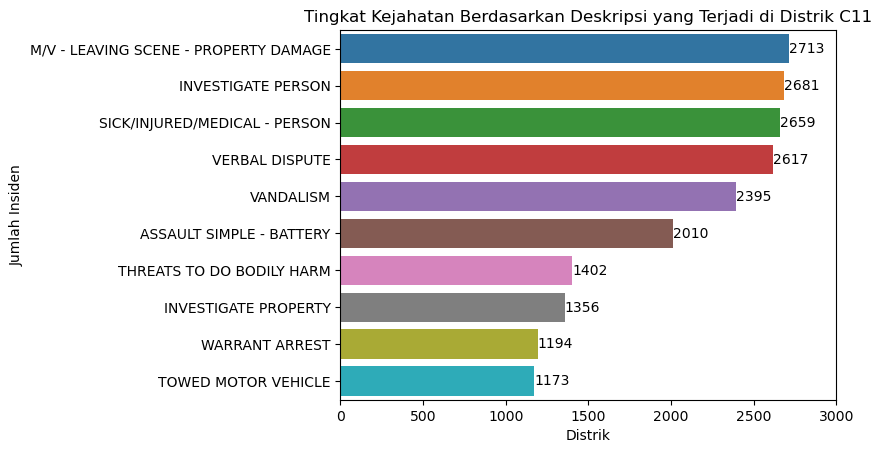

In [241]:
bp15 = sns.barplot(data=df_gb_DISTRICT_C11_INCBER_DESC, y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', ci=False)
for i in bp15.containers:
    bp15.bar_label(i,)

plt.xlim(0, 3000)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan Berdasarkan Deskripsi yang Terjadi di Distrik C11')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi berdasarkan deskripsi di distrik C11 adalah M/V - Leaving Scene - Property Damage dimana ada 2.713 kejadian, lalu diikuti Investigate Person sebanyak 2.681 kejadian, dan yang ketiga adalah Sick/ Injured / Medical - Person sebanyak 2.659 kejadian.

In [238]:
df_gb_DISTRICT_D4_INCBER = df_crime[df_crime['DISTRICT'] == 'D4'].groupby(['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_D4_INCBER

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
29,Larceny,7312
37,Motor Vehicle Accident Response,3882
34,Medical Assistance,2368
55,Simple Assault,2218
26,Investigate Person,2090
40,Other,2088
13,Drug Violation,2026
30,Larceny From Motor Vehicle,2023
56,Towed,1982
57,Vandalism,1755


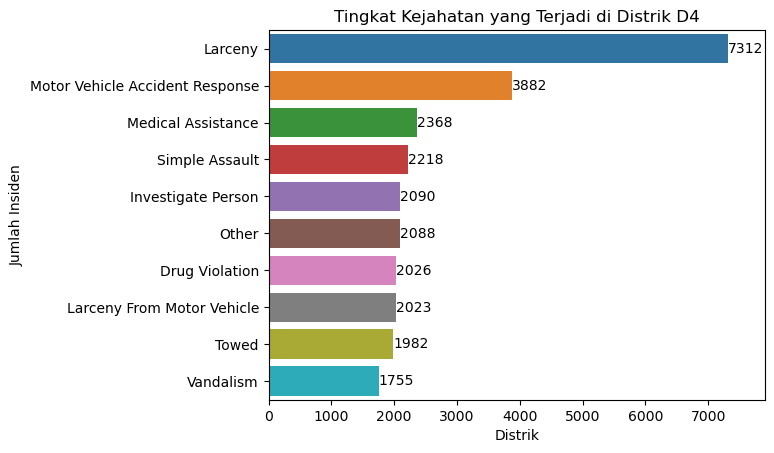

In [245]:
bp16 = sns.barplot(data=df_gb_DISTRICT_D4_INCBER, y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', ci=False)
for i in bp16.containers:
    bp16.bar_label(i,)

plt.xlim(0, 7900)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan yang Terjadi di Distrik D4')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi di distrik D4 adalah Larceby dimana ada 7.312 kejadian, lalu diikuti Motor Vehicle Accident Response sebanyak 3.882 kejadian dan yang ketiga adalah Medical Assistance sebanyak 2.368 kejadian.

In [240]:
df_gb_DISTRICT_D4_INCBER_DESC = df_crime[df_crime['DISTRICT'] == 'D4'].groupby(['OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_DISTRICT_D4_INCBER_DESC

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
100,LARCENY SHOPLIFTING,3219
102,LARCENY THEFT FROM BUILDING,2286
87,INVESTIGATE PERSON,2091
11,ASSAULT SIMPLE - BATTERY,2048
167,TOWED MOTOR VEHICLE,1982
160,SICK/INJURED/MEDICAL - PERSON,1868
104,LARCENY THEFT FROM MV - NON-ACCESSORY,1812
175,VANDALISM,1687
138,PROPERTY - LOST,1409
111,M/V - LEAVING SCENE - PROPERTY DAMAGE,1384


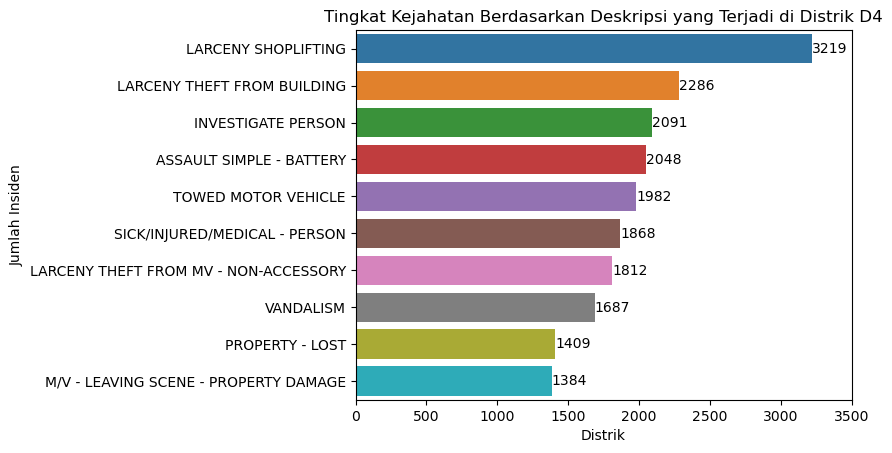

In [246]:
bp17 = sns.barplot(data=df_gb_DISTRICT_D4_INCBER_DESC, y='OFFENSE_DESCRIPTION', x='INCIDENT_NUMBER', ci=False)
for i in bp17.containers:
    bp17.bar_label(i,)

plt.xlim(0, 3500)
plt.xlabel('Distrik')
plt.ylabel('Jumlah Insiden')
plt.title('Tingkat Kejahatan Berdasarkan Deskripsi yang Terjadi di Distrik D4')
plt.xticks(rotation=0)

plt.show()

**Summary**

Tingkat kejadian tertinggi berdasarkan deskripsi di distrik D4 adalah Larceny Shoplifting dimana ada 3.219 kejadian, lalu diikuti Larceny Theft From Building sebanyak 2.286 kejadian, dan yang ketiga adalah Investigate Person sebanyak 2.091 kejadian.

### Berdasarkan `STREET`

In [247]:
df_gb_STREET_INCBER = df_crime.groupby('STREET')['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_STREET_INCBER

,STREET,INCIDENT_NUMBER
4389,WASHINGTON ST,14191
490,BLUE HILL AVE,7794
552,BOYLSTON ST,7219
1305,DORCHESTER AVE,5147
4184,TREMONT ST,4796
2740,MASSACHUSETTS AVE,4705
2007,HARRISON AVE,4608
813,CENTRE ST,4383
1014,COMMONWEALTH AVE,4132
2228,HYDE PARK AVE,3470


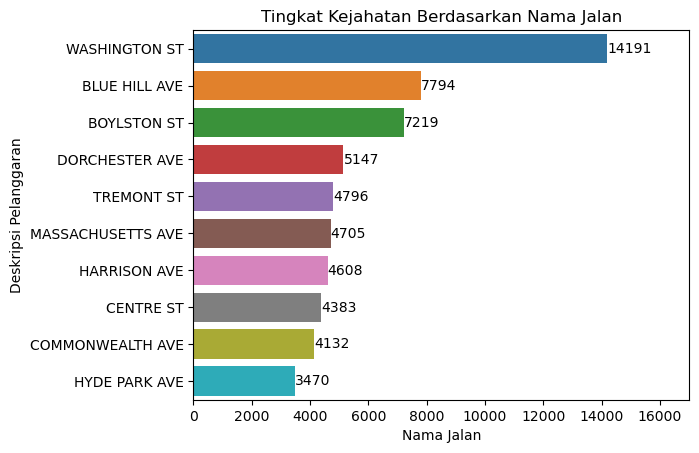

In [249]:
bp_st = sns.barplot(data=df_gb_STREET_INCBER, y='STREET', x='INCIDENT_NUMBER', ci=False)
for i in bp_st.containers:
    bp_st.bar_label(i,)

plt.xlim(0, 17000)
plt.xlabel('Nama Jalan')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Tingkat Kejahatan Berdasarkan Nama Jalan')
plt.xticks(rotation=0)

plt.show()

**Summary**

Jalan Washington ST menjadi jalan dengan tingkat kejadian tertinggi yaitu mencapai 14.191 Kejadian, diikuti oleh jalan Blue Hill Ave sebanyak 7.794 Kejadian, dan Boylston ST sebanyak 7.219 kejadian.

In [250]:
df_gb_STREET_1_INCBER_DESC = df_crime[df_crime['STREET'] == 'WASHINGTON ST'].groupby(['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index().sort_values('INCIDENT_NUMBER', ascending=False).head(10)
df_gb_STREET_1_INCBER_DESC

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
27,Larceny,1933
12,Drug Violation,1222
36,Motor Vehicle Accident Response,1130
33,Medical Assistance,1000
39,Other,996
24,Investigate Person,809
53,Simple Assault,765
44,Property Lost,553
55,Vandalism,515
58,Warrant Arrests,450


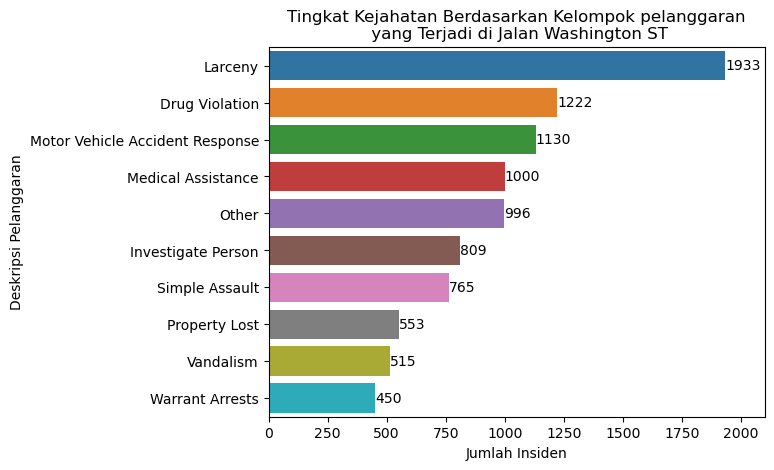

In [254]:
bp_st2 = sns.barplot(data=df_gb_STREET_1_INCBER_DESC, y='OFFENSE_CODE_GROUP', x='INCIDENT_NUMBER', ci=False)
for i in bp_st2.containers:
    bp_st2.bar_label(i,)

plt.xlim(0, 2100)
plt.xlabel('Jumlah Insiden')
plt.ylabel('Deskripsi Pelanggaran')
plt.title('Tingkat Kejahatan Berdasarkan Kelompok pelanggaran\n yang Terjadi di Jalan Washington ST')
plt.xticks(rotation=0)

plt.show()

**Summary**

berdasarkan data dan visualisai diatas kejadian yang terjadi di jalan Washington st kebanyakan merupakan kelompok pelanggaran Larceny sebanyak 1.933 kejadian, lalu diikuti Drug Violation sebanyak 1.222 kejadian, dan ketiga adalah Motor Vehicle Accident Response sebanyak 1.130 kejadian.

## MAP / Folium

In [255]:
# membuat data frame baru

lat_long = df_crime[['DISTRICT', 'Lat', 'Long']].dropna()
lat_long

,DISTRICT,Lat,Long
0,D14,42.357791,-71.139371
1,C11,42.306821,-71.060300
2,D4,42.346589,-71.072429
3,D4,42.334182,-71.078664
4,B3,42.275365,-71.090361
...,...,...,...
319068,D4,42.336951,-71.085748
319069,E18,42.255926,-71.123172
319070,E18,42.255926,-71.123172
319071,E13,42.302333,-71.111565


In [256]:
lat_long = lat_long[lat_long['Lat'] != -1]

In [257]:
lat_long[lat_long['Lat']==-1]

,DISTRICT,Lat,Long


In [258]:
lat_long.describe()

,Lat,Long
count,297397.000000,297397.000000
mean,42.322295,-71.082843
std,0.031897,0.029794
min,42.232413,-71.178674
25%,42.297555,-71.097193
50%,42.325574,-71.077551
75%,42.348624,-71.062558
max,42.395042,-70.963676


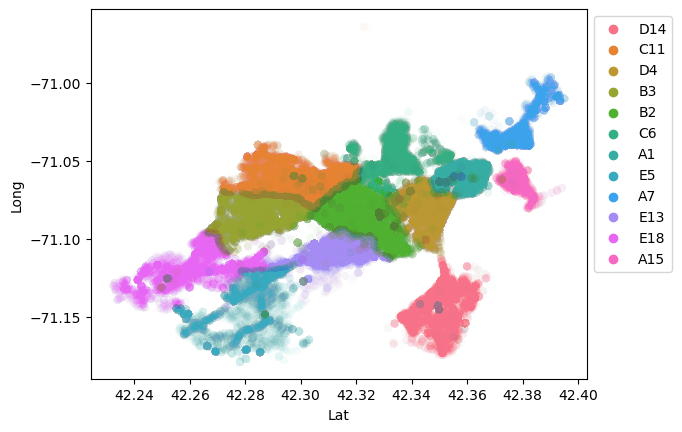

In [259]:
sns.scatterplot(x='Lat', y='Long', hue='DISTRICT', alpha=0.01, data=lat_long)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [260]:
import folium
from folium import Choropleth, Circle, Marker, Map
from folium.plugins import HeatMap, MarkerCluster
import math

In [ ]:
map = folium.Map(location=[42.3601, 71.0589], zoom_start=12)

HeatMap(data=lat_long[['Lat','Long']], radius=10).add_to(map)

map


In [ ]:
# Cluster map of crime/offense incidents 
map2 = Map(location=[42.3601, 71.0589], zoom_start=13)

cluster = MarkerCluster()
for idx, row in lat_long.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        cluster.add_child(Marker([row['Lat'], row['Long']]))
map.add_child(cluster)

## Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang insiden kejadian yang direspon oleh polisi:  

**Berdasarkan waktu**
* dari 319.037 data yang kita miliki, kejadian tertinggi ada di tahun 2017 dimana di tahun tersebut ada 100.883 kejadian di kota boston.
* secara kuartal, kejadian di kota boston mencapai 27.221 kejadian, dimana kuartal 3 di boston adalah musim panas.
* secara bulan, kejadian tertinggi ada di bulan 8 (agustus) pada tahun 2017 yaitu 9.206 kejadian, yaitu di akhir musim panas.
* secara harian tidak terlalu terlihat perbedaan kejadian secara signifikan, berdasarkan data hari jumat adalah puncak banyaknya kejadian (48.488), sedangkan hari minggu merupakan tingkat kejadian terendah (40.312)
* jam tertinggi terjadinya kejadian adalah jam 5 sore, sedangkan jam terendah ada di jam 5 pagi.

**berdasarkan kejadiannya**
* Motor Vehicle Accident Respone merupakan kejadian paling tinggi yang direspon oleh Departement Kepolisian Boston, dimana terjadi 37.132 kejadian atau 11.64% dari total seluruh kejadian sepanjang tahun 2015 - 2018, di ikuti oleh Larceny sebanyak 25.933 kejadian (8.13%), dan yang ketiga adalah Medical Assistance sebanyak 23.540 kali (7.37%).
* Jumlah kejadian tertinggi berdasarkan deskripsinya adalah Sick / Injured / Medical - Person dengan jumlah total 18.783 kejadian selama 2015 - 2018, diikuti oleh Investigate Person sebanyak 18.749 kejadian, dan yang ketiga adalah Motor Vehicle Scene - Property Damage sebanyak 16.323 Kejadian
* jumlah kejadian yang di ikuti oleh penembakan banyak terjadi di deskripsi pelanggaran Assault - Aggravated - Battery yaitu sebanyak 494 kejadian sepanjang tahun 2015 - 2018, diikuti oleh Murder, Non-Negligient Manslaughter sebanyak 121 kejadian, dan yang ketiga adalah Warrant Arrests sebanyak 73 kejadian.
* Berdasarkan Data di atas UCR Part one terjadi sebanyak 61.625 sepanjang tahun 2015 - 2018, lalu pada UCR Part two terjadi sebanyak 97.557 kejadian, dan pada UCR Part three 158.537 kejadian. Sisanya sebanyak 1.318 termasuk kedalam kategori other. 

**Berdasarkan Lokasi**
* Tingkat kejadian tertinggi terjadi di distrik B2 dimana ada 49.939 kejadian, lalu diikuti distrik C11 sebanyak 42.526 kejadian dan yang ketiga adalah distrik D4 sebanyak 41.910 kejadian.
* Tingkat kejadian tertinggi di distrik B2 dan C11 adalah Motor Vehicle Accident Respone dimana ada 6.407 dan 5.305 kejadian, lalu di distrik D4 Tingkat kejadian tertinggi adalah Larceny dimana ada 7.312 kejadian
* Jalan Washington ST menjadi jalan dengan tingkat kejadian tertinggi yaitu mencapai 14.191 Kejadian, diikuti oleh jalan Blue Hill Ave sebanyak 7.794 Kejadian, dan Boylston ST sebanyak 7.219 kejadian. Kejadian yang terjadi di jalan Washington st kebanyakan merupakan kelompok pelanggaran Larceny sebanyak 1.933 kejadian, lalu diikuti Drug Violation sebanyak 1.222 kejadian, dan ketiga adalah Motor Vehicle Accident Response sebanyak 1.130 kejadian.


## Rekomendasi

1. Departement Kepolisian Boston bisa menambahkan perhatian terhadap 3 jenis kelompok kejadian yang sering terjadi dimana 3 jenis kelompok kejadian tersebut memberikan proporsi sebesar 61.31% dari total seluruh kejadian.
    * Polisi bisa memperketat pemberian SIM dan juga harus aktif dalam melakukan penindakan pelanggaran lalu lintas karena Motor Vehicle Accident Response adalah kejadian tertinggi. 
    * Untuk Larceny, petugas harus aktif melakukan pengawasan bukan hanya di jalan namun juga di dalam gedung, 
    * petugas diberikan pendidikan mengenai penangan pertama terhadap kejadian medis.
2. kejadian penembakan kebanyakan terjadi pada kasus penyerangan, kepolisian bisa memperketat pembelian senjata dan juga petugas harus siap dalam menghadapi kasus ini.
3. Kepolisian Boston bisa mengalokasikan petugasnya pada jam - jam sibuk seperti antara jam 09.00 - jam 18.00, dan juga petugas jaga malam di antara jam 12 malam.
4. Kepolisian Boston bisa memberikan penjagaan lebih pada distrik yang banyak terjadi kejadian pelanggaran seperti di distrik B2, C11, dan D4
5. pada jalan washington st polisi harus lebih ekstra karena di jalan ini tingkat kejadian mencapai 2 - 3 kali dari jalanan lain.